[メモ]
- Portfolioの考え方については論文”The value of forecasts_energyfinance”を参照 <p>
 -->ただし、日本の場合はそもそもマーケットの組み合わせによるポートフォリオを組めない<p>
 -->SpotとIntraの組み合わせ比率であれば考えられる
- Trading戦略については、論文"Trading Techniques for European Electricity Markets"を参照
- なので、Spot比率とIntra比率+複数執行戦略で取引戦略を派生させる (売り手、買い手)
- さらなる議論としてSpotとIntraの価格差を利用した投機的取引戦略についても検証する(トレーダー)※ただし、仮想取引はJEPXでは禁止されているから注意

# Read the dataset

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt #描画ライブラリ
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# import pathlib
# import glob
# import math

# Show all the rows and columns up to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Data set for seller/buyer
df_prediction_afterDA = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/df_prediction.csv', sep=',', header=0)

In [3]:
df_prediction_afterDA = df_prediction_afterDA[["DateTime", "Spot", "High", "Low", "Close", "Close_pred"]]

In [4]:
df_prediction_afterDA.head()

,DateTime,Spot,High,Low,Close,Close_pred
0,2017-08-10 00:00:00,7.98,12.98,5.94,9.4,7.60
1,2017-08-10 00:30:00,7.67,12.67,5.63,9.4,7.55
2,2017-08-10 01:00:00,6.86,11.86,5.58,9.4,7.27
3,2017-08-10 01:30:00,6.58,11.58,4.91,9.4,6.67
4,2017-08-10 02:00:00,6.62,11.62,4.88,9.4,6.72


In [5]:
# Data set for trader
df_prediction_beforeDA = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/df_prediction_trader.csv', sep=',', header=0)

In [6]:
df_prediction_beforeDA.head()

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred
0,2017-08-10,1,10.70,12.98,5.94,9.4,8.19,8.10,2017-08-10 00:00:00,7.66
1,2017-08-10,2,6.89,12.67,5.63,9.4,8.04,8.00,2017-08-10 00:30:00,7.41
2,2017-08-10,3,6.42,11.86,5.58,9.4,7.93,8.05,2017-08-10 01:00:00,7.37
3,2017-08-10,4,10.30,11.58,4.91,9.4,7.73,7.80,2017-08-10 01:30:00,7.09
4,2017-08-10,5,10.50,11.62,4.88,9.4,7.93,7.94,2017-08-10 02:00:00,7.16


# Benchmark

## Benchmark 1 (Trade only on DA market)
--> No strategy: Players trade on DA market as much as possible to avoid imbalance risks <p>
    (100% position only on DA market)<p>
--> Calculate return and risk with "Spot price"

### Requierd dataset

In [7]:
# Need actual spot, high, close price
df_benchmark1 = df_prediction_afterDA.copy()

# Drop Close_pred and others for intraday market since players who trade without strategy need only spot price.
df_benchmark1 = df_benchmark1.drop(["Close_pred", "High", "Low", "Close"], axis=1)

df_benchmark1.head()

,DateTime,Spot
0,2017-08-10 00:00:00,7.98
1,2017-08-10 00:30:00,7.67
2,2017-08-10 01:00:00,6.86
3,2017-08-10 01:30:00,6.58
4,2017-08-10 02:00:00,6.62


### Evaluation

Expected return: 8.53
Standard deviation: 4.51
Sharp ratio: 1.89


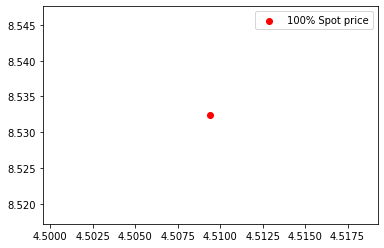

In [8]:
# fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
plt.scatter(x=df_benchmark1["Spot"].std(), y=df_benchmark1["Spot"].mean(), color="r", label="100% Spot price")
print("Expected return: {}".format(df_benchmark1["Spot"].mean().round(2)))
print("Standard deviation: {}".format(df_benchmark1["Spot"].std().round(2)))
print("Sharp ratio: {}".format(round(df_benchmark1["Spot"].mean()/df_benchmark1["Spot"].std(), 2)))
plt.legend();

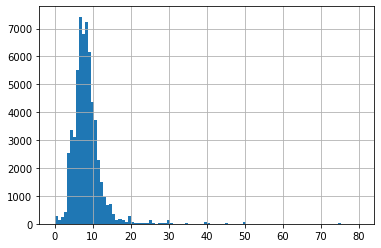

In [9]:
df_benchmark1["Spot"].hist(bins=100);

## Benchmark2 (Trade only on Intraday market)
--> No strategy: Players trade on Intra market (100% position only on Intra market)<p>
    ※ This strategy would be not realistic due to imbalence risk, but let's try to look at the performance <p>
--> Calculate return and risk with "Close price"

### Required dataset

In [127]:
# Need actual spot, high, close price
df_benchmark2 = df_prediction_afterDA.copy()

# Drop Close_pred and others for intraday market since players who trade without strategy need only spot price.
df_benchmark2 = df_benchmark2.drop(["Close_pred", "High", "Low", "Spot"], axis=1)

df_benchmark2.head()

,DateTime,Close
0,2017-08-10 00:00:00,9.4
1,2017-08-10 00:30:00,9.4
2,2017-08-10 01:00:00,9.4
3,2017-08-10 01:30:00,9.4
4,2017-08-10 02:00:00,9.4


### Evaluation

Expected return: 8.58
Standard deviation: 5.12
Sharp ratio: 1.68


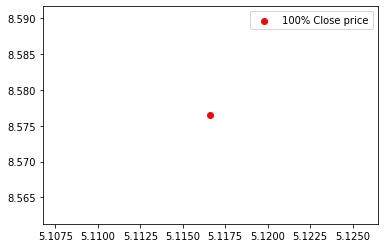

In [128]:
# fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
plt.scatter(x=df_benchmark2["Close"].std(), y=df_benchmark2["Close"].mean(), color="r", label="100% Close price")
print("Expected return: {}".format(df_benchmark2["Close"].mean().round(2)))
print("Standard deviation: {}".format(df_benchmark2["Close"].std().round(2)))
print("Sharp ratio: {}".format(round(df_benchmark2["Close"].mean()/df_benchmark2["Close"].std(), 2)))
plt.legend();

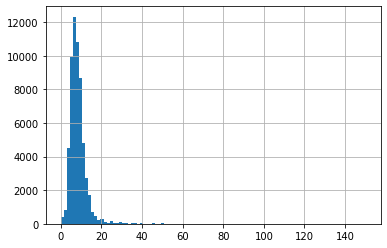

In [12]:
df_benchmark2["Close"].hist(bins=100);

As a result, both expected return and standard deviation on Intraday market are higher than that on DA market <p>
--> Sharp ratio on Intraday market in lower than that of DA market <p>
--> Return is high, but TOO RISKY

In [161]:
Benchmark_seller = df_benchmark1["Spot"].mean().round(2)
Benchmark_seller

8.53

※ On the following part, 
- Strategies for seller aim to sell their posision for higher price than the benchmark
- Strategies for buyer aim to buy their posision for lower price than the benchmark

# Trading strategies for sellers (e.g. power producers)

[Assumption]
- TraderはPrice-takerであり、Priceに影響を与えないこと
- Spotのオークション戦略は無視 (入札決定後の価格を用いて評価する)
- 価格予測なしでの戦略と価格予測有りでの戦略の違いを明確に分け、パフォーマンスを評価する
- 使用するデータはSpot（Tokyo area）, Close Price
- 売買数量については設定できないため、価格の差分のみでリターンとリスクを評価する (手数料も無視)
- 板情報が入手できないのでアイスバーグ方式は無視(https://www.emsc.meti.go.jp/activity/emsc_system/pdf/051_06_00.pdf P.8)
- 全ての注文は約定できるものと仮定する (インバランスでのペナルティは考慮しない)

[Logic of trading without prediction: Benchmark]
- Consider the position balance between DA and intraday market (Sensitivity analysis of the bit acceptance ratio is needed) <p>
    --> Make the portfolio between DA market and Intraday market with 100% ~ 0% combinations.
- If the auction on DA market cannot win; <p>
    --> Selling limit order at 0%, 1%, 5%, 10% higher than spot price will make.
    --> If it is not excuted, sell all the position with market order at close price.

[Logic of trading with predicitoin]
- Basically the same as the benchmark strategy
- Predicted price is used for sensitivity analysis of excution price.
    
※The condition of successful execution: Ask price < High price

## Strategy 1 (Trading with prediction before DA) without execution strategy
100% position of either DA market or Intraday market<p>
--> Players have the information of 1-dayahead spot price and predicted price before DA market <p>
1) Choose the higher price of either 1dayahead spot price or before DA market <p>
    --> The proportion for each position depends on the prices

### Required dataset

In [162]:
# Need predicted price before DA market and 1 dayahead spot price
df_seller_strategy1 = df_prediction_beforeDA.copy()
df_seller_strategy1["Spot_1dayahead"] = df_seller_strategy1["Spot"].shift(48)
# Drop rows that include NaN
df_seller_strategy1 = df_seller_strategy1.dropna(how='any', axis=0).reset_index(drop=True)

# Make lists for price information
Spot_list = list(df_seller_strategy1["Spot_1dayahead"])
High_list = list(df_seller_strategy1["High"])
Close_list = list(df_seller_strategy1["Close"])
Pred_list = list(df_seller_strategy1["Close_pred"])
# Judge_success = []

# list for executed orders
Executed = []
Judge = []    
for s, h, c, p  in zip(Spot_list, High_list, Close_list, Pred_list):
    # Trade on DA market
    if s >= p:
        if s <= h:
            Executed.append(s)
            Judge.append("True")
        else:
            Executed.append(c)
            Judge.append("False")                
    # Trade on Intra markets
    else:
        if p <= h:
            Executed.append(p)
            Judge.append("True")
        else:
            Executed.append(c)
            Judge.append("False")                
df_seller_strategy1["ExecutedOrder"] = pd.Series(Executed)
df_seller_strategy1["Judge"] = pd.Series(Judge)

#     Judge_success.append((df_seller_bench["Judge_" + str(i) + "%"] == 'True').sum())
# #For graph
# Judge_success = pd.Series(Judge_success)

In [163]:
df_seller_strategy1.tail()

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred,Spot_1dayahead,ExecutedOrder,Judge
59467,2020-12-31,44,35.0,70.0,33.00,70.00,35.0,50.00,2020-12-31 21:30:00,23.26,50.00,50.00,True
59468,2020-12-31,45,42.0,70.0,41.01,45.48,40.0,40.00,2020-12-31 22:00:00,22.94,40.00,40.00,True
59469,2020-12-31,46,42.0,70.0,35.00,41.33,40.0,40.00,2020-12-31 22:30:00,21.89,40.00,40.00,True
59470,2020-12-31,47,37.0,70.0,33.93,36.66,35.0,33.21,2020-12-31 23:00:00,16.42,33.21,33.21,True
59471,2020-12-31,48,27.0,37.5,23.93,26.46,25.0,25.00,2020-12-31 23:30:00,14.09,25.00,25.00,True


### Evaluation

Expected return: 8.96
Standard deviation: 4.02
Sharp ratio: 2.23
Information ratio: 0.11


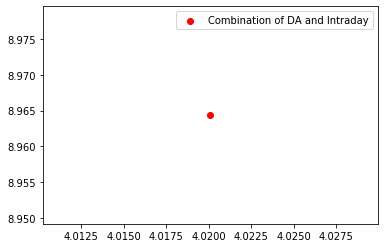

In [165]:
# fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
plt.scatter(x=df_seller_strategy1["ExecutedOrder"].std(), y=df_seller_strategy1["ExecutedOrder"].mean(), color="r", label="Combination of DA and Intraday")
print("Expected return: {}".format(df_seller_strategy1["ExecutedOrder"].mean().round(2)))
print("Standard deviation: {}".format(df_seller_strategy1["ExecutedOrder"].std().round(2)))
print("Sharp ratio: {}".format(round(df_seller_strategy1["ExecutedOrder"].mean()/df_seller_strategy1["ExecutedOrder"].std(), 2)))
print("Information ratio: {}".format(round((df_seller_strategy1["ExecutedOrder"] - Benchmark_seller).mean()/(df_seller_strategy1["ExecutedOrder"] - Benchmark_seller).std(), 2)))
plt.legend();

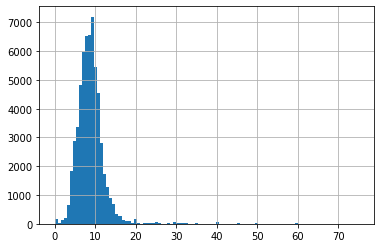

In [133]:
df_seller_strategy1["ExecutedOrder"].hist(bins=100);

Much higher than benchmarks

## Strategy 1 with execusion strategy
- Derive strategy1 with execution strategy <p>
※ 10-fold evaluation is necessary

### Required dataset

In [173]:
# Need predicted price before DA market and 1 dayahead spot price
df_seller_strategy1_ex = df_prediction_beforeDA.copy()
df_seller_strategy1_ex["Spot_1dayahead"] = df_seller_strategy1_ex["Spot"].shift(48)
# Drop rows that include NaN
df_seller_strategy1_ex = df_seller_strategy1_ex.dropna(how='any', axis=0).reset_index(drop=True)

# Make lists for price information
Spot_list = list(df_seller_strategy1_ex["Spot_1dayahead"])
High_list = list(df_seller_strategy1_ex["High"])
Close_list = list(df_seller_strategy1_ex["Close"])
# Judge_success = []

# Order and execution with execusion range
for i in list(range(0, 101, 1)):
    # list for executed orders
    Executed_i = []
    # list for checking the execution results
    Judge_i = []    
    # Derive the predicted price with the range from +0% ~ +20%
    Pred_list_i = list((df_seller_strategy1_ex["Close_pred"]* (1 + i/100)).round(2))
    for s, h, c, p in zip(Spot_list, High_list, Close_list, Pred_list_i):
        # Trade on DA market
        if s >= p:
            if s <= h:
                Executed_i.append(s)
                Judge_i.append("True")
            else:
                Executed_i.append(c)
                Judge_i.append("False")                
        # Trade on Intra markets
        else:
            if p <= h:
                Executed_i.append(p)
                Judge_i.append("True")
            else:
                Executed_i.append(c)
                Judge_i.append("False")                
    df_seller_strategy1_ex["Exec_" + str(i) + "%"] = pd.Series(Executed_i)
    df_seller_strategy1_ex["Judge_" + str(i) + "%"] = pd.Series(Judge_i)

#     Judge_success.append((df_seller_bench["Judge_" + str(i) + "%"] == 'True').sum())
# #For graph
# Judge_success = pd.Series(Judge_success)

In [174]:
df_seller_strategy1_ex.head()

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred,Spot_1dayahead,Exec_0%,Judge_0%,Exec_1%,Judge_1%,Exec_2%,Judge_2%,Exec_3%,Judge_3%,Exec_4%,Judge_4%,Exec_5%,Judge_5%,Exec_6%,Judge_6%,Exec_7%,Judge_7%,Exec_8%,Judge_8%,Exec_9%,Judge_9%,Exec_10%,Judge_10%,Exec_11%,Judge_11%,Exec_12%,Judge_12%,Exec_13%,Judge_13%,Exec_14%,Judge_14%,Exec_15%,Judge_15%,Exec_16%,Judge_16%,Exec_17%,Judge_17%,Exec_18%,Judge_18%,Exec_19%,Judge_19%,Exec_20%,Judge_20%,Exec_21%,Judge_21%,Exec_22%,Judge_22%,Exec_23%,Judge_23%,Exec_24%,Judge_24%,Exec_25%,Judge_25%,Exec_26%,Judge_26%,Exec_27%,Judge_27%,Exec_28%,Judge_28%,Exec_29%,Judge_29%,Exec_30%,Judge_30%,Exec_31%,Judge_31%,Exec_32%,Judge_32%,Exec_33%,Judge_33%,Exec_34%,Judge_34%,Exec_35%,Judge_35%,Exec_36%,Judge_36%,Exec_37%,Judge_37%,Exec_38%,Judge_38%,Exec_39%,Judge_39%,Exec_40%,Judge_40%,Exec_41%,Judge_41%,Exec_42%,Judge_42%,Exec_43%,Judge_43%,Exec_44%,...,Exec_51%,Judge_51%,Exec_52%,Judge_52%,Exec_53%,Judge_53%,Exec_54%,Judge_54%,Exec_55%,Judge_55%,Exec_56%,Judge_56%,Exec_57%,Judge_57%,Exec_58%,Judge_58%,Exec_59%,Judge_59%,Exec_60%,Judge_60%,Exec_61%,Judge_61%,Exec_62%,Judge_62%,Exec_63%,Judge_63%,Exec_64%,Judge_64%,Exec_65%,Judge_65%,Exec_66%,Judge_66%,Exec_67%,Judge_67%,Exec_68%,Judge_68%,Exec_69%,Judge_69%,Exec_70%,Judge_70%,Exec_71%,Judge_71%,Exec_72%,Judge_72%,Exec_73%,Judge_73%,Exec_74%,Judge_74%,Exec_75%,Judge_75%,Exec_76%,Judge_76%,Exec_77%,Judge_77%,Exec_78%,Judge_78%,Exec_79%,Judge_79%,Exec_80%,Judge_80%,Exec_81%,Judge_81%,Exec_82%,Judge_82%,Exec_83%,Judge_83%,Exec_84%,Judge_84%,Exec_85%,Judge_85%,Exec_86%,Judge_86%,Exec_87%,Judge_87%,Exec_88%,Judge_88%,Exec_89%,Judge_89%,Exec_90%,Judge_90%,Exec_91%,Judge_91%,Exec_92%,Judge_92%,Exec_93%,Judge_93%,Exec_94%,Judge_94%,Exec_95%,Judge_95%,Exec_96%,Judge_96%,Exec_97%,Judge_97%,Exec_98%,Judge_98%,Exec_99%,Judge_99%,Exec_100%,Judge_100%
0,2017-08-11,1,6.86,11.50,5.39,7.41,7.74,8.19,2017-08-11 00:00:00,7.47,8.19,8.19,True,8.19,True,8.19,True,8.19,True,8.19,True,8.19,True,8.19,True,8.19,True,8.19,True,8.19,True,8.22,True,8.29,True,8.37,True,8.44,True,8.52,True,8.59,True,8.67,True,8.74,True,8.81,True,8.89,True,8.96,True,9.04,True,9.11,True,9.19,True,9.26,True,9.34,True,9.41,True,9.49,True,9.56,True,9.64,True,9.71,True,9.79,True,9.86,True,9.94,True,10.01,True,10.08,True,10.16,True,10.23,True,10.31,True,10.38,True,10.46,True,10.53,True,10.61,True,10.68,True,10.76,...,11.28,True,11.35,True,11.43,True,11.50,True,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False,7.41,False
1,2017-08-11,2,10.71,10.71,6.06,6.50,6.71,8.04,2017-08-11 00:30:00,7.42,8.04,8.04,True,8.04,True,8.04,True,8.04,True,8.04,True,8.04,True,8.04,True,8.04,True,8.04,True,8.09,True,8.16,True,8.24,True,8.31,True,8.38,True,8.46,True,8.53,True,8.61,True,8.68,True,8.76,True,8.83,True,8.90,True,8.98,True,9.05,True,9.13,True,9.20,True,9.28,True,9.35,True,9.42,True,9.50,True,9.57,True,9.65,True,9.72,True,9.79,True,9.87,True,9.94,True,10.02,True,10.09,True,10.17,True,10.24,True,10.31,True,10.39,True,10.46,True,10.54,True,10.61,True,10.68,...,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,False,6.50,Fals

### Evaluation

- Seek the best execution point

In [292]:
n_splits=100

train_size = df_seller_strategy1_ex.index[-1]
sample_size = int(train_size/n_splits)
train_index_list = list(np.linspace(sample_size, train_size, n_splits, endpoint = True, dtype='int'))
train_index_list

# # Confirming the split logic
# for train_index in train_index_list:
#     # Divide the train/valid set  into 10 folds and pick up it.
#     X_train = df_seller_strategy1_ex.iloc[:train_index]
#     print("start:", train_index - sample_size)
#     print("end:", train_index)

[594,
 1188,
 1783,
 2378,
 2972,
 3567,
 4162,
 4757,
 5351,
 5946,
 6541,
 7135,
 7730,
 8325,
 8920,
 9514,
 10109,
 10704,
 11298,
 11893,
 12488,
 13083,
 13677,
 14272,
 14867,
 15461,
 16056,
 16651,
 17246,
 17840,
 18435,
 19030,
 19624,
 20219,
 20814,
 21409,
 22003,
 22598,
 23193,
 23787,
 24382,
 24977,
 25572,
 26166,
 26761,
 27356,
 27950,
 28545,
 29140,
 29735,
 30329,
 30924,
 31519,
 32114,
 32708,
 33303,
 33898,
 34492,
 35087,
 35682,
 36277,
 36871,
 37466,
 38061,
 38655,
 39250,
 39845,
 40440,
 41034,
 41629,
 42224,
 42818,
 43413,
 44008,
 44603,
 45197,
 45792,
 46387,
 46981,
 47576,
 48171,
 48766,
 49360,
 49955,
 50550,
 51144,
 51739,
 52334,
 52929,
 53523,
 54118,
 54713,
 55307,
 55902,
 56497,
 57092,
 57686,
 58281,
 58876,
 59471]

In [293]:
BestExec_I = []

for train_index in train_index_list:
    X_train = df_seller_strategy1_ex[:train_index]

    cols = []

    # List for the results for evaluation
    PortfolioReturn = []
    StandardDeviation = []
    Max = []
    Min = []
    SharpRatio = []
    InformationRatio = []
    
    for i in list(range(0, 51, 1)):
        Return_i = []
        Exec_list_i = list(X_train["Exec_" + str(i) + "%"]) 
        for e in Exec_list_i:
            Return_i.append(e)

        Return_i = pd.Series(Return_i)
        PortfolioReturn.append(Return_i.mean().round(2))
        StandardDeviation.append(Return_i.std().round(2))
        Max.append(Return_i.max().round(2))
        Min.append(Return_i.min().round(2))
        SharpRatio.append((Return_i.mean()/Return_i.std()).round(2))
        InformationRatio.append(round((Return_i - Benchmark_seller).mean()/(Return_i - Benchmark_seller).std(), 3))

        # Make columns names
        cols.append(i)

    # Make dataframe for evaluation and  switch columns and row.
    df_seller_strategy1_ex_eval = pd.DataFrame()
    # df_seller_strategy1_ex_eval = df_seller_strategy1_ex_eval.T

    #各算出結果をdf_portfolio_benchの列へ追加する
    df_seller_strategy1_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
    df_seller_strategy1_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
    df_seller_strategy1_ex_eval["Max"] = pd.Series(Max)
    df_seller_strategy1_ex_eval["Min"] = pd.Series(Min)
    df_seller_strategy1_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
    df_seller_strategy1_ex_eval["InformationRatio"] = pd.Series(InformationRatio)

    df_seller_strategy1_ex_eval.index = cols
    df_seller_strategy1_ex_eval =  df_seller_strategy1_ex_eval.reset_index()
    df_seller_strategy1_ex_eval = df_seller_strategy1_ex_eval.rename(columns={"index": "ExecBuffer(%)"})

    BestExec_I.append(df_seller_strategy1_ex_eval["ExecBuffer(%)"][df_seller_strategy1_ex_eval["InformationRatio"] == df_seller_strategy1_ex_eval["InformationRatio"].max()].max())

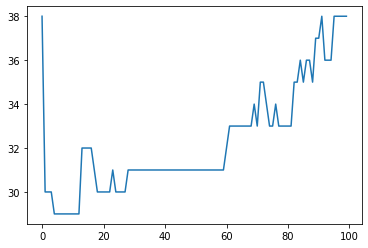

In [294]:
# The best execution of 100 different periods
BestExec = pd.Series(BestExec_I)
BestExec.plot();

In [295]:
BestExec.tail()

95    38
96    38
97    38
98    38
99    38
dtype: int64

- It seems there is a trend for best execution
- Choose the most recent execution buffer "Exec_38%"

Expected return: 9.81
Standard deviation: 4.61
Sharp ratio: 2.13
Information ratio: 0.28


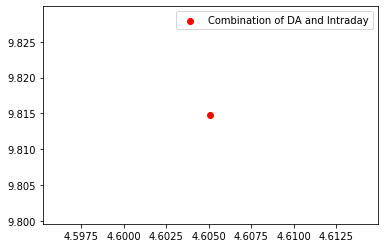

In [215]:
# Evaluate the portfolio with the best execution level and for the validation period.
i = 38

# fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
plt.scatter(x=df_seller_strategy1_ex["Exec_" + str(i) + "%"].std(), y=df_seller_strategy1_ex["Exec_" + str(i) + "%"].mean(), color="r", label="Combination of DA and Intraday")
print("Expected return: {}".format(df_seller_strategy1_ex["Exec_" + str(i) + "%"].mean().round(2)))
print("Standard deviation: {}".format(df_seller_strategy1_ex["Exec_" + str(i) + "%"].std().round(2)))
print("Sharp ratio: {}".format(round(df_seller_strategy1_ex["Exec_" + str(i) + "%"].mean()/df_seller_strategy1_ex["Exec_" + str(i) + "%"].std(), 2)))
print("Information ratio: {}".format(round((df_seller_strategy1_ex["Exec_" + str(i) + "%"] - Benchmark_seller).mean()/(df_seller_strategy1_ex["Exec_" + str(i) + "%"] - Benchmark_seller).std(), 2)))

plt.legend();

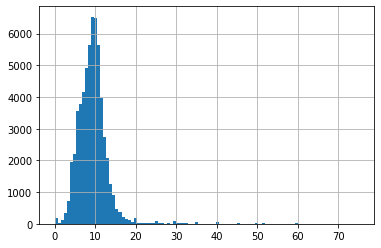

In [25]:
df_seller_strategy1_ex["Exec_" + str(i) + "%"].hist(bins=100);

- Plot all the possible portfolios

In [216]:
cols = []

# List for the results for evaluation
PortfolioReturn = []
StandardDeviation = []
Max = []
Min = []
SharpRatio = []
InformationRatio = []

for i in list(range(0, 51, 1)):
    Return_i = []
    Exec_list_i = list(df_seller_strategy1_ex["Exec_" + str(i) + "%"]) 
    for e in Exec_list_i:
        Return_i.append(e)

    Return_i = pd.Series(Return_i)
    PortfolioReturn.append(Return_i.mean().round(2))
    StandardDeviation.append(Return_i.std().round(2))
    Max.append(Return_i.max().round(2))
    Min.append(Return_i.min().round(2))
    SharpRatio.append((Return_i.mean()/Return_i.std()).round(2))
    InformationRatio.append(round((Return_i - Benchmark_seller).mean()/(Return_i - Benchmark_seller).std(), 3))

    # Make columns names
    cols.append("Exec+" + str(i) + "%")

# Make dataframe for evaluation and  switch columns and row.
df_seller_strategy1_ex_eval = pd.DataFrame()
# df_seller_strategy1_ex_eval = df_seller_strategy1_ex_eval.T

#各算出結果をdf_portfolio_benchの列へ追加する
df_seller_strategy1_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
df_seller_strategy1_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
df_seller_strategy1_ex_eval["Max"] = pd.Series(Max)
df_seller_strategy1_ex_eval["Min"] = pd.Series(Min)
df_seller_strategy1_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
df_seller_strategy1_ex_eval["InformationRatio"] = pd.Series(InformationRatio)

df_seller_strategy1_ex_eval.index = cols
# df_seller_strategy1_ex_eval =  df_seller_strategy1_ex_eval.reset_index()
# df_seller_strategy1_ex_eval = df_seller_strategy1_ex_eval.rename(columns={"index": "ExecBuffer"})

In [217]:
df_seller_strategy1_ex_eval.head()

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
Exec+0%,8.96,4.02,75.1,0.01,2.23,0.108
Exec+1%,8.99,4.02,75.1,0.01,2.24,0.114
Exec+2%,9.01,4.02,75.1,0.01,2.24,0.120
Exec+3%,9.03,4.02,75.1,0.01,2.24,0.125
Exec+4%,9.06,4.03,75.1,0.01,2.25,0.132


[Global Minimum Variance Portfolio]
Expected return: 9.03
Standard deviation: 4.02
Sharp ratio: 2.24
Information ratio: 0.125
[Best Execution Portfolio]
Expected return: 9.81
Standard deviation: 4.61
Sharp ratio: 2.13
Information ratio: 0.28


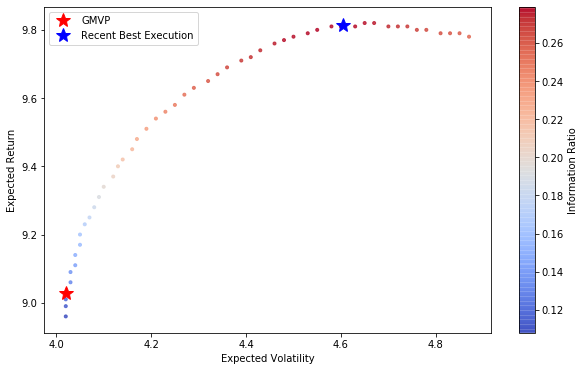

In [310]:
plt.figure(figsize=(10,6))

# Scatter plot all the possible portfolios
plt.scatter(df_seller_strategy1_ex_eval["StandardDeviation"], df_seller_strategy1_ex_eval["PortfolioReturn"], c=df_seller_strategy1_ex_eval["InformationRatio"], marker='.', alpha=0.8, cmap='coolwarm')

# Pick up the portfolios on the global minimum variance portfolio
std_min = df_seller_strategy1_ex_eval[df_seller_strategy1_ex_eval["StandardDeviation"] == df_seller_strategy1_ex_eval["StandardDeviation"].min()]
GMVP = std_min[std_min["PortfolioReturn"] == std_min["PortfolioReturn"].max()].reset_index()
# Global minimum variance portfolio
plt.plot(GMVP["StandardDeviation"], GMVP["PortfolioReturn"], 'r*', markersize=15.0, label="GMVP")
print("[Global Minimum Variance Portfolio]")
print("Expected return: {}".format(GMVP["PortfolioReturn"][0]))
print("Standard deviation: {}".format(GMVP["StandardDeviation"][0]))
print("Sharp ratio: {}".format(GMVP["SharpRatio"][0]))
print("Information ratio: {}".format(GMVP["InformationRatio"][0]))

# The Best Execusion
i = 38
plt.plot(df_seller_strategy1_ex["Exec_" + str(i) + "%"].std(), df_seller_strategy1_ex["Exec_" + str(i) + "%"].mean(), "b*", markersize=15.0, label="Recent Best Execution")
print("[Best Execution Portfolio]")
print("Expected return: {}".format(df_seller_strategy1_ex["Exec_" + str(i) + "%"].mean().round(2)))
print("Standard deviation: {}".format(df_seller_strategy1_ex["Exec_" + str(i) + "%"].std().round(2)))
print("Sharp ratio: {}".format(round(df_seller_strategy1_ex["Exec_" + str(i) + "%"].mean() / df_seller_strategy1_ex["Exec_" + str(i) + "%"].std(),2)))
print("Information ratio: {}".format(round((df_seller_strategy1_ex["Exec_" + str(i) + "%"] - Benchmark_seller).mean() / (df_seller_strategy1_ex["Exec_" + str(i) + "%"] - Benchmark_seller).std(),2)))

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Information Ratio')
plt.legend(loc="upper left");

In [311]:
GMVP

,index,ExecBuffer(%),PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
0,3,3,9.03,4.02,75.1,0.01,2.24,0.125


## Strategy 2 (Trading with prediction after DA)
--> Players have the information of spot price and predicted price after DA market <p>
1) Players trade with pre-determined portfolio proportion that ranges from 0% to 100%. <p>
2) Positions is derived with execution range if players have the possition of intraday market <p>

### Required dataset

In [221]:
# Need predicted price after DA market and spot price
df_seller_strategy2 = df_prediction_afterDA.copy()

# Make lists for price information
Spot_list = list(df_seller_strategy2["Spot"])
High_list = list(df_seller_strategy2["High"])
Close_list = list(df_seller_strategy2["Close"])
Pred_list_i = list(df_seller_strategy2["Close_pred"])
# Judge_success = []
                   
# list for executed orders
Executed_i = []
# list for checking the execution results
Judge_i = []    
                   
# Calculate executed price
for h, c, p in zip(High_list, Close_list, Pred_list_i):     
    # Trade on Intra markets
    if p <= h:
        Executed_i.append(p)
        Judge_i.append("True")
    else:
        Executed_i.append(c)
        Judge_i.append("False")                 

df_seller_strategy2["ExecutedOrder"] = pd.Series(Executed_i)
df_seller_strategy2["Judge"] = pd.Series(Judge_i)

#     Judge_success.append((df_seller_bench["Judge_" + str(i) + "%"] == 'True').sum())
# #For graph
# Judge_success = pd.Series(Judge_success)

In [222]:
df_seller_strategy2.tail()

,DateTime,Spot,High,Low,Close,Close_pred,ExecutedOrder,Judge
59515,2020-12-31 21:30:00,35.0,70.0,33.00,70.00,32.43,32.43,True
59516,2020-12-31 22:00:00,45.0,70.0,41.01,45.48,35.90,35.90,True
59517,2020-12-31 22:30:00,40.0,70.0,35.00,41.33,33.15,33.15,True
59518,2020-12-31 23:00:00,35.0,70.0,33.93,36.66,27.12,27.12,True
59519,2020-12-31 23:30:00,25.0,37.5,23.93,26.46,20.41,20.41,True


### Evaluation

In [244]:
portfolio_weights= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

cols = []

Return = [] 
PortfolioReturn = []
StandardDeviation = []
Max = []
Min = []
SharpRatio = []
InformationRatio = []

Spot_list = list(df_seller_strategy2["Spot"])
Intra_list = list(df_seller_strategy2["ExecutedOrder"])

for weight in portfolio_weights:
    Return = []
    for spot, intra in zip(Spot_list, Exec_list):
        # DA market 100%
        if weight == 1.0:
            Return.append(spot*weight)
        # Trade both on DA and Intra day
        else:
            Return.append(spot*weight + intra*(1-weight))
    # Set colmun name
    cols.append("DA" + str(weight*100) + "%")

    # Results
    Return = pd.Series(Return)
    PortfolioReturn.append(Return.mean().round(2))
    StandardDeviation.append(Return.std().round(2))
    Max.append(Return.max().round(2))
    Min.append(Return.min().round(2))
    SharpRatio.append((Return.mean()/Return.std()).round(2))
    InformationRatio.append(round((Return - Benchmark_seller).mean() / (Return - Benchmark_seller).std(), 3))
    
#df_portfolio_benchの列を設定し、行列を入替えて調整する
df_seller_strategy2_eval = pd.DataFrame()
df_seller_strategy2_eval = df_seller_strategy2_eval.T

#各算出結果をdf_portfolio_benchの列へ追加する
df_seller_strategy2_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
df_seller_strategy2_eval["StandardDeviation"] = pd.Series(StandardDeviation)
df_seller_strategy2_eval["Max"] = pd.Series(Max)
df_seller_strategy2_eval["Min"] = pd.Series(Min)
df_seller_strategy2_eval["SharpRatio"] = pd.Series(SharpRatio)
df_seller_strategy2_eval["InformationRatio"] = pd.Series(InformationRatio)
df_seller_strategy2_eval.index = cols
# df_seller_strategy2_eval =  df_seller_strategy2_eval.reset_index()
# df_seller_strategy2_eval = df_seller_strategy2_eval.rename(columns={"index": "Portfolio_DA(%)"})

In [246]:
df_seller_strategy2_eval

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA0%,8.34,3.62,61.79,0.15,2.31,-0.052
DA10.0%,8.36,3.70,63.61,0.14,2.26,-0.046
DA20.0%,8.38,3.78,65.43,0.12,2.22,-0.040
DA30.0%,8.40,3.87,67.25,0.11,2.17,-0.034
DA40.0%,8.42,3.96,69.07,0.09,2.13,-0.028
DA50.0%,8.44,4.05,70.90,0.08,2.09,-0.023
DA60.0%,8.46,4.14,72.72,0.07,2.04,-0.018
DA70.0%,8.48,4.23,74.54,0.05,2.00,-0.013
DA80.0%,8.49,4.32,76.36,0.04,1.97,-0.008
DA90.0%,8.51,4.41,78.18,0.02,1.93,-0.004


[Global Minimum Variance Portfolio]
Expected return: 8.34
Standard deviation: 3.62
Sharp ratio: 2.31
Information ratio: -0.052
[Best Execution Portfolio]
Expected return: 8.53
Standard deviation: 8.53
Sharp ratio: 1.89
Information ratio: 0.001


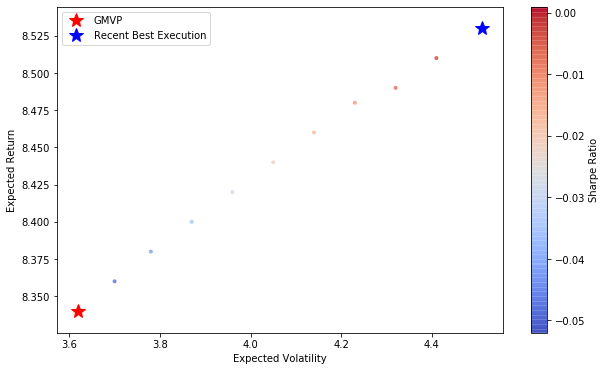

In [313]:
plt.figure(figsize=(10,6))

# Scatter plot all the possible portfolios
plt.scatter(df_seller_strategy2_eval["StandardDeviation"], df_seller_strategy2_eval["PortfolioReturn"], c=df_seller_strategy2_eval["InformationRatio"], marker='.', alpha=0.8, cmap='coolwarm')

# Pick up the portfolios on the global minimum variance portfolio
std_min = df_seller_strategy2_eval[df_seller_strategy2_eval["StandardDeviation"] == df_seller_strategy2_eval["StandardDeviation"].min()]
GMVP = std_min[std_min["PortfolioReturn"] == std_min["PortfolioReturn"].max()].reset_index()

# Global minimum variance portfolio
plt.plot(GMVP["StandardDeviation"], GMVP["PortfolioReturn"], 'r*', markersize=15.0, label="GMVP")
print("[Global Minimum Variance Portfolio]")
print("Expected return: {}".format(GMVP["PortfolioReturn"][0]))
print("Standard deviation: {}".format(GMVP["StandardDeviation"][0]))
print("Sharp ratio: {}".format(GMVP["SharpRatio"][0]))
print("Information ratio: {}".format(GMVP["InformationRatio"][0]))


# The Best Execusion
i = 38
Best = df_seller_strategy2_eval[df_seller_strategy2_eval["InformationRatio"] == df_seller_strategy2_eval["InformationRatio"].max()]
plt.plot(Best["StandardDeviation"], Best["PortfolioReturn"], "b*", markersize=15.0, label="Recent Best Execution")
print("[Best Execution Portfolio]")
print("Expected return: {}".format(Best["PortfolioReturn"][0]))
print("Standard deviation: {}".format(Best["PortfolioReturn"][0]))
print("Sharp ratio: {}".format(Best["SharpRatio"][0]))
print("Information ratio: {}".format(Best["InformationRatio"][0]))


plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.legend(loc="upper left");

In [308]:
GMVP

,index,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
0,DA0%,8.34,3.62,61.79,0.15,2.31,-0.052


In [304]:
Best

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA100.0%,8.53,4.51,80.0,0.01,1.89,0.001


## Strategy 2 with execusion strategy
--> Players have the information of spot price and predicted price after DA market <p>
1) Players trade with pre-determined portfolio proportion that ranges from 0% to 100%. <p>
2) Positions is derived with execution range if players have the possition of intraday market <p>

### Required dataset

In [248]:
# Need predicted price after DA market and spot price
df_seller_strategy2_ex = df_prediction_beforeDA.copy()

# Make lists for price information
Spot_list = list(df_seller_strategy2_ex["Spot"])
High_list = list(df_seller_strategy2_ex["High"])
Close_list = list(df_seller_strategy2_ex["Close"])

# Order and execution with execusion range
for i in list(range(0, 51, 1)):
    # list for executed orders
    Executed_i = []
    # list for checking the execution results
    Judge_i = []    
    # Derive the predicted price with the range
    Pred_list_i = list((df_seller_strategy2_ex["Close_pred"]* (1 + i/100)).round(2))
    for h, c, p in zip(High_list, Close_list, Pred_list_i):     
        # Trade on Intra markets
        if p <= h:
            Executed_i.append(p)
            Judge_i.append("True")
        else:
            Executed_i.append(c)
            Judge_i.append("False")                 
                
    df_seller_strategy2_ex["Exec_" + str(i) + "%"] = pd.Series(Executed_i)
    df_seller_strategy2_ex["Judge_" + str(i) + "%"] = pd.Series(Judge_i)

In [249]:
df_seller_strategy2_ex.tail()

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred,Exec_0%,Judge_0%,Exec_1%,Judge_1%,Exec_2%,Judge_2%,Exec_3%,Judge_3%,Exec_4%,Judge_4%,Exec_5%,Judge_5%,Exec_6%,Judge_6%,Exec_7%,Judge_7%,Exec_8%,Judge_8%,Exec_9%,Judge_9%,Exec_10%,Judge_10%,Exec_11%,Judge_11%,Exec_12%,Judge_12%,Exec_13%,Judge_13%,Exec_14%,Judge_14%,Exec_15%,Judge_15%,Exec_16%,Judge_16%,Exec_17%,Judge_17%,Exec_18%,Judge_18%,Exec_19%,Judge_19%,Exec_20%,Judge_20%,Exec_21%,Judge_21%,Exec_22%,Judge_22%,Exec_23%,Judge_23%,Exec_24%,Judge_24%,Exec_25%,Judge_25%,Exec_26%,Judge_26%,Exec_27%,Judge_27%,Exec_28%,Judge_28%,Exec_29%,Judge_29%,Exec_30%,Judge_30%,Exec_31%,Judge_31%,Exec_32%,Judge_32%,Exec_33%,Judge_33%,Exec_34%,Judge_34%,Exec_35%,Judge_35%,Exec_36%,Judge_36%,Exec_37%,Judge_37%,Exec_38%,Judge_38%,Exec_39%,Judge_39%,Exec_40%,Judge_40%,Exec_41%,Judge_41%,Exec_42%,Judge_42%,Exec_43%,Judge_43%,Exec_44%,Judge_44%,Exec_45%,Judge_45%,Exec_46%,Judge_46%,Exec_47%,Judge_47%,Exec_48%,Judge_48%,Exec_49%,Judge_49%,Exec_50%,Judge_50%
59515,2020-12-31,44,35.0,70.0,33.00,70.00,35.0,50.00,2020-12-31 21:30:00,23.26,23.26,True,23.49,True,23.73,True,23.96,True,24.19,True,24.42,True,24.66,True,24.89,True,25.12,True,25.35,True,25.59,True,25.82,True,26.05,True,26.28,True,26.52,True,26.75,True,26.98,True,27.21,True,27.45,True,27.68,True,27.91,True,28.14,True,28.38,True,28.61,True,28.84,True,29.08,True,29.31,True,29.54,True,29.77,True,30.01,True,30.24,True,30.47,True,30.70,True,30.94,True,31.17,True,31.40,True,31.63,True,31.87,True,32.10,True,32.33,True,32.56,True,32.80,True,33.03,True,33.26,True,33.49,True,33.73,True,33.96,True,34.19,True,34.42,True,34.66,True,34.89,True
59516,2020-12-31,45,42.0,70.0,41.01,45.48,40.0,40.00,2020-12-31 22:00:00,22.94,22.94,True,23.17,True,23.40,True,23.63,True,23.86,True,24.09,True,24.32,True,24.55,True,24.78,True,25.00,True,25.23,True,25.46,True,25.69,True,25.92,True,26.15,True,26.38,True,26.61,True,26.84,True,27.07,True,27.30,True,27.53,True,27.76,True,27.99,True,28.22,True,28.45,True,28.68,True,28.90,True,29.13,True,29.36,True,29.59,True,29.82,True,30.05,True,30.28,True,30.51,True,30.74,True,30.97,True,31.20,True,31.43,True,31.66,True,31.89,True,32.12,True,32.35,True,32.57,True,32.80,True,33.03,True,33.26,True,33.49,True,33.72,True,33.95,True,34.18,True,34.41,True
59517,2020-12-31,46,42.0,70.0,35.00,41.33,40.0,40.00,2020-12-31 22:30:00,21.89,21.89,True,22.11,True,22.33,True,22.55,True,22.77,True,22.98,True,23.20,True,23.42,True,23.64,True,23.86,True,24.08,True,24.30,True,24.52,True,24.74,True,24.95,True,25.17,True,25.39,True,25.61,True,25.83,True,26.05,True,26.27,True,26.49,True,26.71,True,26.92,True,27.14,True,27.36,True,27.58,True,27.80,True,28.02,True,28.24,True,28.46,True,28.68,True,28.89,True,29.11,True,29.33,True,29.55,True,29.77,True,29.99,True,30.21,True,30.43,True,30.65,True,30.86,True,31.08,True,31.30,True,31.52,True,31.74,True,31.96,True,32.18,True,32.40,True,32.62,True,32.84,True
59518,2020-12-31,47,37.0,70.0,33.93,36.66,35.0,33.21,2020-12-31 23:00:00,16.42,16.42,True,16.58,True,16.75,True,16.91,True,17.08,True,17.24,True,17.41,True,17.57,True,17.73,True,17.90,True,18.06,True,18.23,True,18.39,True,18.55,True,18.72,True,18.88,True,19.05,True,19.21,True,19.38,True,19.54,True,19.70,True,19.87,True,20.03,True,20.20,True,20.36,True,20.52,True,20.69,True,20.85,True,21.02,True,21.18,True,21.35,True,21.51,True,21.67,True,21.84,True,22.00,True,22.17,True,22.33,True,22.50,True,22.66,True,22.82,True,22.99,True,23.15,True,23.32,True,23.48,True,23.64,True,23.81,True,23.97,True,24.14,True,24.30,True,24.47,True,24.63,True
59519,2020-12-31,48,27.0,37.5,23.93,26.46,25.0,25.00,2020-12-31 23:30:00,14.09,14.09,True,14.23,True,14.37,True,14.51,True,14.65,True,14.79,True,14.94,True,15.08,True,15.22,True,15.36,True,15.50,True,15.64,True,15.78,True,15.92,True,16.06,True,16.20,True,16.34,True,16.49,True,16.63,True,16.77,True,16.91,True,17.05,True,17.19,True,17.33,True,17.47,True,17.61,True,17.75,True,17.89,True,18.04,True,18.18,True,18.32,True,18.4

### Evaluation

- Look for the best execution

In [296]:
n_splits=100

train_size = df_seller_strategy2_ex.index[-1]
sample_size = int(train_size/n_splits)
train_index_list = list(np.linspace(sample_size, train_size, n_splits, endpoint = True, dtype='int'))
train_index_list

# # Confirming the split logic
# for train_index in train_index_list:
#     # Divide the train/valid set  into 10 folds and pick up it.
#     X_train = df_seller_strategy2_ex.iloc[:train_index]
#     print("start:", train_index - sample_size)
#     print("end:", train_index)

[595,
 1190,
 1785,
 2380,
 2975,
 3570,
 4166,
 4761,
 5356,
 5951,
 6546,
 7142,
 7737,
 8332,
 8927,
 9522,
 10118,
 10713,
 11308,
 11903,
 12498,
 13094,
 13689,
 14284,
 14879,
 15474,
 16069,
 16665,
 17260,
 17855,
 18450,
 19045,
 19641,
 20236,
 20831,
 21426,
 22021,
 22617,
 23212,
 23807,
 24402,
 24997,
 25593,
 26188,
 26783,
 27378,
 27973,
 28569,
 29164,
 29759,
 30354,
 30949,
 31544,
 32140,
 32735,
 33330,
 33925,
 34520,
 35116,
 35711,
 36306,
 36901,
 37496,
 38092,
 38687,
 39282,
 39877,
 40472,
 41068,
 41663,
 42258,
 42853,
 43448,
 44044,
 44639,
 45234,
 45829,
 46424,
 47019,
 47615,
 48210,
 48805,
 49400,
 49995,
 50591,
 51186,
 51781,
 52376,
 52971,
 53567,
 54162,
 54757,
 55352,
 55947,
 56543,
 57138,
 57733,
 58328,
 58923,
 59519]

In [297]:
# Confirm the best execution point
BestExec_S = []
BestExec_I = []

for train_index in train_index_list:
    X_train = df_seller_strategy2_ex[:train_index]
    Spot_list = list(X_train["Spot"])
   
    cols = []
    PortfolioReturn = []
    StandardDeviation = []
#     Max = []
#     Min = []
    SharpRatio = []
    InformationRatio = []
    
    portfolio_weights= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    for i in list(range(0, 51, 1)):
        for weight in portfolio_weights:
            Return_iw = []
            Exec_list = list(X_train["Exec_" + str(i) + "%"])
            for spot, intra in zip(Spot_list, Exec_list):
                # DA market 100%
                if weight == 1.0:
                    Return_iw.append(spot*weight)
                # Trade both on DA and Intra day
                else:
                    Return_iw.append(spot*weight + intra*(1-weight))
            # Set colmun name
            if weight == 1.0:
                cols.append(str(0))
            else:
                cols.append(str(i))

            # Results
            Return_iw = pd.Series(Return_iw)
            PortfolioReturn.append(Return_iw.mean().round(2))
            StandardDeviation.append(Return_iw.std().round(2))
#             Max.append(Return_iw.max().round(2))
#             Min.append(Return_iw.min().round(2))
            SharpRatio.append((Return_iw.mean()/Return_iw.std()).round(2))
            InformationRatio.append(round((Return_iw - Benchmark_seller).mean() / (Return_iw - Benchmark_seller).std(), 3))

    # Results of every portfolios derived by execution strateties
    df_seller_strategy2_ex_eval = pd.DataFrame()
    df_seller_strategy2_ex_eval = df_seller_strategy2_ex_eval.T

    #各算出結果をdf_portfolio_benchの列へ追加する
    df_seller_strategy2_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
    df_seller_strategy2_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
#     df_seller_strategy2_ex_eval["Max"] = pd.Series(Max)
#     df_seller_strategy2_ex_eval["Min"] = pd.Series(Min)
    df_seller_strategy2_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
    df_seller_strategy2_ex_eval["InformationRatio"] = pd.Series(InformationRatio)

    df_seller_strategy2_ex_eval.index = cols
    df_seller_strategy2_ex_eval = df_seller_strategy2_ex_eval.reset_index()
    df_seller_strategy2_ex_eval = df_seller_strategy2_ex_eval.rename(columns={"index": "ExecBuffer(%)"})

    BestExec_S.append(df_seller_strategy2_ex_eval["ExecBuffer(%)"][df_seller_strategy2_ex_eval["SharpRatio"] == df_seller_strategy2_ex_eval["SharpRatio"].max()].max())
    BestExec_I.append(df_seller_strategy2_ex_eval["ExecBuffer(%)"][df_seller_strategy2_ex_eval["InformationRatio"] == df_seller_strategy2_ex_eval["InformationRatio"].max()].max())

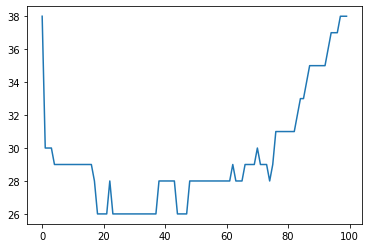

In [298]:
# BestExec = pd.Series(BestExec)
BestExec = pd.Series(BestExec_I).astype(int)
BestExec.plot()

- Plot all the possible portfolios

In [314]:
Spot_list = list(X_train["Spot"])

portfolio_weights= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
execution_buffers = list(range(0, 51, 1))

cols = []

Return = [] 
PortfolioReturn = []
StandardDeviation = []
Max = []
Min = []
SharpRatio = []
InformationRatio = []

for i in execution_buffers:
    Exec_list = list(X_train["Exec_" + str(i) + "%"])
    for weight in portfolio_weights:
        Return_iw = []
        for spot, intra in zip(Spot_list, Exec_list):
            # DA market 100%
            if weight == 1.0:
                Return_iw.append(spot*weight)
            # Trade both on DA and Intra day
            else:
                Return_iw.append(spot*weight + intra*(1-weight))
        # Set colmun name for execution buffer
        if weight == 1.0:
            cols.append("DA100%")
        else:
            cols.append("DA" + str(weight*100) + "%_Exec+" + str(i) + "%")

        # Results
        Return_iw = pd.Series(Return_iw)
        PortfolioReturn.append(Return_iw.mean().round(2))
        StandardDeviation.append(Return_iw.std().round(2))
        Max.append(Return_iw.max().round(2))
        Min.append(Return_iw.min().round(2))
        SharpRatio.append((Return_iw.mean()/Return_iw.std()).round(2))
        InformationRatio.append(round((Return_iw - Benchmark_seller).mean() / (Return_iw - Benchmark_seller).std(), 3))

#df_portfolio_benchの列を設定し、行列を入替えて調整する
df_seller_strategy2_ex_eval = pd.DataFrame()
df_seller_strategy2_ex_eval = df_seller_strategy2_ex_eval.T

#各算出結果をdf_portfolio_benchの列へ追加する
df_seller_strategy2_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
df_seller_strategy2_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
df_seller_strategy2_ex_eval["Max"] = pd.Series(Max)
df_seller_strategy2_ex_eval["Min"] = pd.Series(Min)
df_seller_strategy2_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
df_seller_strategy2_ex_eval["InformationRatio"] = pd.Series(InformationRatio)

df_seller_strategy2_ex_eval.index = cols
# df_seller_strategy2_ex_eval =  df_seller_strategy2_ex_eval.reset_index()
# df_seller_strategy2_ex_eval = df_seller_strategy2_ex_eval.rename(columns={"index": "ExecBuffer(%)"})

In [316]:
Best = df_seller_strategy2_ex_eval[df_seller_strategy2_ex_eval["InformationRatio"] == df_seller_strategy2_ex_eval["InformationRatio"].max()]
Best

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA0%_Exec+35%,9.69,3.89,51.25,0.01,2.49,0.298
DA0%_Exec+36%,9.70,3.93,51.63,0.01,2.47,0.298
DA0%_Exec+37%,9.71,3.96,52.01,0.01,2.45,0.298
DA0%_Exec+38%,9.72,4.00,52.38,0.01,2.43,0.298


[Global Minimum Variance Portfolio: 0]
Expected return: 8.21
Standard deviation: 2.57
Sharp ratio: 3.19
Information ratio: -0.125
[Best Execution Portfolio: 0%_Exec+35%]
Expected return: 9.69
Standard deviation: 3.89
Sharp ratio: 2.49
Information ratio: 0.298


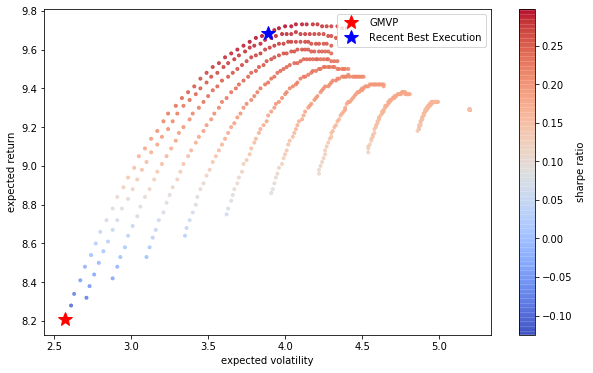

In [321]:
plt.figure(figsize=(10,6))

# Scatter plot all the possible portfolios
plt.scatter(df_seller_strategy2_ex_eval["StandardDeviation"], df_seller_strategy2_ex_eval["PortfolioReturn"], c=df_seller_strategy2_ex_eval["InformationRatio"], marker='.', alpha=0.8, cmap='coolwarm')

# Pick up the portfolios on the global minimum variance portfolio
std_min = df_seller_strategy2_ex_eval[df_seller_strategy2_ex_eval["StandardDeviation"] == df_seller_strategy2_ex_eval["StandardDeviation"].min()]
GMVP = std_min[std_min["PortfolioReturn"] == std_min["PortfolioReturn"].max()].reset_index()
# Global minimum variance portfolio
plt.plot(GMVP["StandardDeviation"], GMVP["PortfolioReturn"], 'r*', markersize=15.0, label="GMVP")
print("[Global Minimum Variance Portfolio: " + str(GMVP.index[0]) + "]")
print("Expected return: {}".format(GMVP["PortfolioReturn"][0]))
print("Standard deviation: {}".format(GMVP["StandardDeviation"][0]))
print("Sharp ratio: {}".format(GMVP["SharpRatio"][0]))
print("Information ratio: {}".format(GMVP["InformationRatio"][0]))

# The Best Execusion
DA_weight = 0
i = 35
Best_Portfolio = (DA_weight * df_seller_strategy2_ex["Spot"]) + ((1 - DA_weight) * df_seller_strategy2_ex["Exec_" + str(i) + "%"])
plt.plot(Best_Portfolio.std(), Best_Portfolio.mean(), "b*", markersize=15.0, label="Recent Best Execution")
print("[Best Execution Portfolio: " + str(DA_weight) + "%_Exec+" + str(i) + "%]")
print("Expected return: {}".format(Best_Portfolio.mean().round(2)))
print("Standard deviation: {}".format(Best_Portfolio.std().round(2)))
print("Sharp ratio: {}".format(round(Best_Portfolio.mean() / Best_Portfolio.std(), 2)))
print("Information ratio: {}".format(round((Best_Portfolio - Benchmark_seller).mean() / (Best_Portfolio - Benchmark_seller).std(), 3)))

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='sharpe ratio')
plt.legend(loc="upper right");

In [320]:
GMVP

,index,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
0,DA0%_Exec+0%,8.21,2.57,38.86,0.01,3.19,-0.125


# Trading strategy for buyers (e.g. retailers)

[Assumption]
- TraderはPrice-takerであり、Priceに影響を与えないこと
- Spotのオークション戦略は無視 (入札決定後の価格を用いて評価する)
- 価格予測なしでの戦略と価格予測有りでの戦略の違いを明確に分け、パフォーマンスを評価する
- 使用するデータはSpot（Tokyo area）, Close Price
- 売買数量については設定できないため、価格の差分のみでリターンとリスクを評価する (手数料も無視)
- 板情報が入手できないのでアイスバーグ方式は無視(https://www.emsc.meti.go.jp/activity/emsc_system/pdf/051_06_00.pdf P.8)
- 全ての注文は約定できるものと仮定する (インバランスでのペナルティは考慮しない)
    

[Logic of trading without prediction: Benchmark]
- Sensitivity analysis of the bit acceptance ratio on Day-ahead market is needed <p>
    --> Make the portfolio between DA market and Intraday market with 100% ~ 0% combinations.
- If the auction on DA market cannot win; <p>
    --> Buy limit order a certain amoun lower than spot price will make.
    --> If it is not excuted, buy all the position with market order at close price.

[Logic of trading with predicitoin]
- Basically the same as the benchmark strategy
- Predicted price is used for sensitivity analysis of excution price.
    
※The condition of successful execution: Bid price > High price

In [325]:
Benchmark_buyer = -df_benchmark1["Spot"].mean().round(2)
Benchmark

-8.53

## Strategy 1 (Trading with prediction before DA) without execution strategy

### Required dataset

In [326]:
# Need predicted price before DA market and 1 dayahead spot price
df_buyer_strategy1 = df_prediction_beforeDA.copy()
df_buyer_strategy1["Spot_1dayahead"] = df_buyer_strategy1["Spot"].shift(48)
# Drop rows that include NaN
df_buyer_strategy1 = df_buyer_strategy1.dropna(how='any', axis=0).reset_index(drop=True)

# Make lists for price information
Spot_list = list(df_buyer_strategy1["Spot_1dayahead"])
Low_list = list(df_buyer_strategy1["Low"])
Close_list = list(df_buyer_strategy1["Close"])
Pred_list = list(df_buyer_strategy1["Close_pred"])
# Judge_success = []

# list for executed orders
Executed = []
Judge = []    
for s, l, c, p  in zip(Spot_list, Low_list, Close_list, Pred_list):
    # Trade on DA market
    if s <= p:
        if s >= l:
            Executed.append(-s)
            Judge.append("True")
        else:
            Executed.append(-c)
            Judge.append("False")                
    # Trade on Intra markets
    else:
        if p <= l:
            Executed.append(-p)
            Judge.append("True")
        else:
            Executed.append(-c)
            Judge.append("False")                
df_buyer_strategy1["ExecutedOrder"] = pd.Series(Executed)
df_buyer_strategy1["Judge"] = pd.Series(Judge)

#     Judge_success.append((df_seller_bench["Judge_" + str(i) + "%"] == 'True').sum())
# #For graph
# Judge_success = pd.Series(Judge_success)

In [327]:
df_buyer_strategy1.tail()

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred,Spot_1dayahead,ExecutedOrder,Judge
59467,2020-12-31,44,35.0,70.0,33.00,70.00,35.0,50.00,2020-12-31 21:30:00,23.26,50.00,-23.26,True
59468,2020-12-31,45,42.0,70.0,41.01,45.48,40.0,40.00,2020-12-31 22:00:00,22.94,40.00,-22.94,True
59469,2020-12-31,46,42.0,70.0,35.00,41.33,40.0,40.00,2020-12-31 22:30:00,21.89,40.00,-21.89,True
59470,2020-12-31,47,37.0,70.0,33.93,36.66,35.0,33.21,2020-12-31 23:00:00,16.42,33.21,-16.42,True
59471,2020-12-31,48,27.0,37.5,23.93,26.46,25.0,25.00,2020-12-31 23:30:00,14.09,25.00,-14.09,True


### Evaluation

Expected return: -8.19
Standard deviation: 3.97
Sharp ratio: -2.06
Information ratio: 0.087


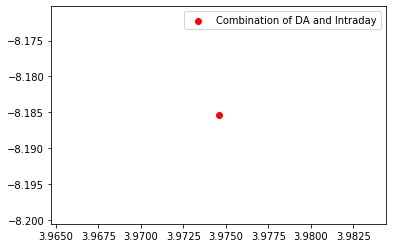

In [328]:
# fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
plt.scatter(x=df_buyer_strategy1["ExecutedOrder"].std(), y=df_buyer_strategy1["ExecutedOrder"].mean(), color="r", label="Combination of DA and Intraday")
print("Expected return: {}".format(df_buyer_strategy1["ExecutedOrder"].mean().round(2)))
print("Standard deviation: {}".format(df_buyer_strategy1["ExecutedOrder"].std().round(2)))
print("Sharp ratio: {}".format(round(df_buyer_strategy1["ExecutedOrder"].mean()/df_buyer_strategy1["ExecutedOrder"].std(),2)))
print("Information ratio: {}".format(round((df_buyer_strategy1["ExecutedOrder"] - Benchmark_buyer).mean() / (df_buyer_strategy1["ExecutedOrder"] - Benchmark_buyer).std(),3)))

plt.legend();

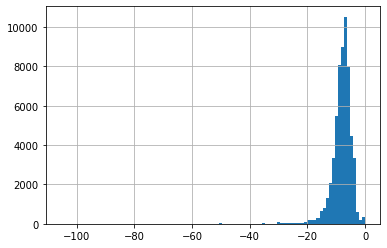

In [53]:
df_buyer_strategy1["ExecutedOrder"].hist(bins=100);

## Strategy 1 with execusion strategy

### Required dataset

In [331]:
# Need predicted price before DA market and 1 dayahead spot price
df_buyer_strategy1_ex = df_prediction_beforeDA.copy()
df_buyer_strategy1_ex["Spot_1dayahead"] = df_buyer_strategy1_ex["Spot"].shift(48)
# Drop rows that include NaN
df_buyer_strategy1_ex = df_buyer_strategy1_ex.dropna(how='any', axis=0).reset_index(drop=True)

# Make lists for price information
Spot_list = list(df_buyer_strategy1_ex["Spot_1dayahead"])
Low_list = list(df_buyer_strategy1_ex["Low"])
Close_list = list(df_buyer_strategy1_ex["Close"])
# Judge_success = []

# Order and execution with execusion range
for i in list(range(0, 51, 1)):
    # list for executed orders
    Executed_i = []
    # list for checking the execution results
    Judge_i = []    
    # Derive the predicted price with the range from +0% ~ +20%
    Pred_list_i = list((df_buyer_strategy1_ex["Close_pred"]* (1 - i/100)).round(2))
    for s, l, c, p in zip(Spot_list, Low_list, Close_list, Pred_list_i):
        # Trade on DA market
        if s <= p:
            if s >= l:
                Executed_i.append(-s)
                Judge_i.append("True")
            else:
                Executed_i.append(-c)
                Judge_i.append("False")                
        # Trade on Intra markets
        else:
            if p >= l:
                Executed_i.append(-p)
                Judge_i.append("True")
            else:
                Executed_i.append(-c)
                Judge_i.append("False")                
    df_buyer_strategy1_ex["Exec_" + str(i) + "%"] = pd.Series(Executed_i)
    df_buyer_strategy1_ex["Judge_" + str(i) + "%"] = pd.Series(Judge_i)

#     Judge_success.append((df_seller_bench["Judge_" + str(i) + "%"] == 'True').sum())
# #For graph
# Judge_success = pd.Series(Judge_success)

In [332]:
df_buyer_strategy1_ex.head()

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred,Spot_1dayahead,Exec_0%,Judge_0%,Exec_1%,Judge_1%,Exec_2%,Judge_2%,Exec_3%,Judge_3%,Exec_4%,Judge_4%,Exec_5%,Judge_5%,Exec_6%,Judge_6%,Exec_7%,Judge_7%,Exec_8%,Judge_8%,Exec_9%,Judge_9%,Exec_10%,Judge_10%,Exec_11%,Judge_11%,Exec_12%,Judge_12%,Exec_13%,Judge_13%,Exec_14%,Judge_14%,Exec_15%,Judge_15%,Exec_16%,Judge_16%,Exec_17%,Judge_17%,Exec_18%,Judge_18%,Exec_19%,Judge_19%,Exec_20%,Judge_20%,Exec_21%,Judge_21%,Exec_22%,Judge_22%,Exec_23%,Judge_23%,Exec_24%,Judge_24%,Exec_25%,Judge_25%,Exec_26%,Judge_26%,Exec_27%,Judge_27%,Exec_28%,Judge_28%,Exec_29%,Judge_29%,Exec_30%,Judge_30%,Exec_31%,Judge_31%,Exec_32%,Judge_32%,Exec_33%,Judge_33%,Exec_34%,Judge_34%,Exec_35%,Judge_35%,Exec_36%,Judge_36%,Exec_37%,Judge_37%,Exec_38%,Judge_38%,Exec_39%,Judge_39%,Exec_40%,Judge_40%,Exec_41%,Judge_41%,Exec_42%,Judge_42%,Exec_43%,Judge_43%,Exec_44%,Judge_44%,Exec_45%,Judge_45%,Exec_46%,Judge_46%,Exec_47%,Judge_47%,Exec_48%,Judge_48%,Exec_49%,Judge_49%,Exec_50%,Judge_50%
0,2017-08-11,1,6.86,11.50,5.39,7.41,7.74,8.19,2017-08-11 00:00:00,7.47,8.19,-7.47,True,-7.40,True,-7.32,True,-7.25,True,-7.17,True,-7.10,True,-7.02,True,-6.95,True,-6.87,True,-6.80,True,-6.72,True,-6.65,True,-6.57,True,-6.50,True,-6.42,True,-6.35,True,-6.27,True,-6.20,True,-6.13,True,-6.05,True,-5.98,True,-5.90,True,-5.83,True,-5.75,True,-5.68,True,-5.60,True,-5.53,True,-5.45,True,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False,-7.41,False
1,2017-08-11,2,10.71,10.71,6.06,6.50,6.71,8.04,2017-08-11 00:30:00,7.42,8.04,-7.42,True,-7.35,True,-7.27,True,-7.20,True,-7.12,True,-7.05,True,-6.97,True,-6.90,True,-6.83,True,-6.75,True,-6.68,True,-6.60,True,-6.53,True,-6.46,True,-6.38,True,-6.31,True,-6.23,True,-6.16,True,-6.08,True,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False,-6.50,False
2,2017-08-11,3,10.23,10.23,5.76,6.02,6.24,7.93,2017-08-11 01:00:00,7.04,7.93,-7.04,True,-6.97,True,-6.90,True,-6.83,True,-6.76,True,-6.69,True,-6.62,True,-6.55,True,-6.48,True,-6.41,True,-6.34,True,-6.27,True,-6.20,True,-6.12,True,-6.05,True,-5.98,True,-5.91,True,-5.84,True,-5.77,True,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False,-6.02,False
3,2017-08-11,4,10.07,10.07,5.61,5.86,6.07,7.73,2017-08-11 01:30:00,6.77,7.73,-6.77,True,-6.70,True,-6.63,True,-6.57,True,-6.50,True,-6.43,True,-6.36,True,-6.30,True,-6.23,True,-6.16,True,-6.09,True,-6.03,True,-5.96,True,-5.89,True,-5.82,True,-5.75,True,-5.69,True,-5.62,True,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False,-5.86,False
4,2017-08-11,5,10.09,10.09,4.89,5.88,6.09,7.93,2017-08-11 02:00:00,6.75,7.93,-6.75,True,-6.68,True,-6.62,True,-6.55,True,-6.48,True,-6.41,True,-6.34,True,-6.28,True,-6.21,True,-6.14,True,-6.08,True,-6.01,True,-5.94,True,-5.87,True,-5.80,True,-5.74,True,-5.67,True,-5.60,True,-5.54,True,-5.47,True,-

### Evaluation

In [364]:
n_splits=100

train_size = df_buyer_strategy1_ex.index[-1]
train_index_list = list(np.linspace(train_size/n_splits, train_size, n_splits, endpoint = True, dtype='int'))
train_index_list

# # Confirming the split logic
# for train_index in train_index_list:
#     # Divide the train/valid set  into 10 folds and pick up it.
#     X_train = df_buyer_strategy1_ex.iloc[:train_index]
#     print("TRAIN:", train_index)

[594,
 1189,
 1784,
 2378,
 2973,
 3568,
 4162,
 4757,
 5352,
 5947,
 6541,
 7136,
 7731,
 8325,
 8920,
 9515,
 10110,
 10704,
 11299,
 11894,
 12488,
 13083,
 13678,
 14273,
 14867,
 15462,
 16057,
 16651,
 17246,
 17841,
 18436,
 19030,
 19625,
 20220,
 20814,
 21409,
 22004,
 22598,
 23193,
 23788,
 24383,
 24977,
 25572,
 26167,
 26761,
 27356,
 27951,
 28546,
 29140,
 29735,
 30330,
 30924,
 31519,
 32114,
 32709,
 33303,
 33898,
 34493,
 35087,
 35682,
 36277,
 36872,
 37466,
 38061,
 38656,
 39250,
 39845,
 40440,
 41034,
 41629,
 42224,
 42819,
 43413,
 44008,
 44603,
 45197,
 45792,
 46387,
 46982,
 47576,
 48171,
 48766,
 49360,
 49955,
 50550,
 51145,
 51739,
 52334,
 52929,
 53523,
 54118,
 54713,
 55308,
 55902,
 56497,
 57092,
 57686,
 58281,
 58876,
 59471]

In [365]:
BestExec_S = []
BestExec_I = []

for train_index in train_index_list:
    X_train = df_buyer_strategy1_ex[:train_index]

    cols = []

    # List for the results for evaluation
    PortfolioReturn = []
    StandardDeviation = []
    Max = []
    Min = []
    SharpRatio = []
    InformationRatio=[]

    for i in list(range(0, 51, 1)):
        Return_i = []
        Exec_list_i = list(X_train["Exec_" + str(i) + "%"]) 
        for e in Exec_list_i:
            Return_i.append(e)

        Return_i = pd.Series(Return_i)
        PortfolioReturn.append(Return_i.mean().round(2))
        StandardDeviation.append(Return_i.std().round(2))
        Max.append(Return_i.max().round(2))
        Min.append(Return_i.min().round(2))
        SharpRatio.append((Return_i.mean()/Return_i.std()).round(2))
        InformationRatio.append(round((Return_i - Benchmark_buyer).mean() / (Return_i - Benchmark_buyer).std(), 3))

        # Make columns names
        cols.append(i)

    # Make dataframe for evaluation and  switch columns and row.
    df_buyer_strategy1_ex_eval = pd.DataFrame()
    # df_seller_strategy1_ex_eval = df_seller_strategy1_ex_eval.T

    #各算出結果をdf_portfolio_benchの列へ追加する
    df_buyer_strategy1_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
    df_buyer_strategy1_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
    df_buyer_strategy1_ex_eval["Max"] = pd.Series(Max)
    df_buyer_strategy1_ex_eval["Min"] = pd.Series(Min)
    df_buyer_strategy1_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
    df_buyer_strategy1_ex_eval["InformationRatio"] = pd.Series(InformationRatio)

    df_buyer_strategy1_ex_eval.index = cols
    df_buyer_strategy1_ex_eval = df_buyer_strategy1_ex_eval.reset_index()
    df_buyer_strategy1_ex_eval = df_buyer_strategy1_ex_eval.rename(columns={"index": "ExecBuffer(%)"})

    BestExec_S.append(df_buyer_strategy1_ex_eval["ExecBuffer(%)"][df_buyer_strategy1_ex_eval["SharpRatio"] == df_buyer_strategy1_ex_eval["SharpRatio"].max()].max())
    BestExec_I.append(df_buyer_strategy1_ex_eval["ExecBuffer(%)"][df_buyer_strategy1_ex_eval["InformationRatio"] == df_buyer_strategy1_ex_eval["InformationRatio"].max()].max())    

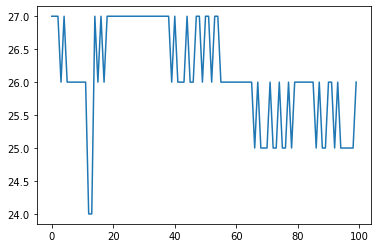

In [368]:
# The best execution of 100 different periods
BestExec = pd.Series(BestExec_I)
BestExec.plot();

In [369]:
BestExec.tail()

95    25
96    25
97    25
98    25
99    26
dtype: int64

In [370]:
cols = []

# List for the results for evaluation
PortfolioReturn = []
StandardDeviation = []
Max = []
Min = []
SharpRatio = []
InformationRatio = []

for i in list(range(0, 51, 1)):
    Return_i = []
    Exec_list_i = list(df_buyer_strategy1_ex["Exec_" + str(i) + "%"]) 
    for e in Exec_list_i:
        Return_i.append(e)

    Return_i = pd.Series(Return_i)
    PortfolioReturn.append(Return_i.mean().round(2))
    StandardDeviation.append(Return_i.std().round(2))
    Max.append(Return_i.max().round(2))
    Min.append(Return_i.min().round(2))
    SharpRatio.append((Return_i.mean()/Return_i.std()).round(2))
    InformationRatio.append(round((Return_i - Benchmark_buyer).mean() / (Return_i - Benchmark_buyer).std(), 3))

    # Make columns names
    cols.append("Exec+" + str(i) + "%")

# Make dataframe for evaluation and  switch columns and row.
df_buyer_strategy1_ex_eval = pd.DataFrame()
# df_buyer_strategy1_ex_eval = df_seller_strategy1_ex_eval.T

#各算出結果をdf_portfolio_benchの列へ追加する
df_buyer_strategy1_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
df_buyer_strategy1_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
df_buyer_strategy1_ex_eval["Max"] = pd.Series(Max)
df_buyer_strategy1_ex_eval["Min"] = pd.Series(Min)
df_buyer_strategy1_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
df_buyer_strategy1_ex_eval["InformationRatio"] = pd.Series(InformationRatio)

df_buyer_strategy1_ex_eval.index = cols

[Global Minimum Variance Portfolio]
Expected return: -8.51
Standard deviation: 4.27
Sharp ratio: -1.99
Information ratio: 0.005
[Best Execution Portfolio]
Expected return: -7.83
Standard deviation: 4.65
Sharp ratio: -1.68
Information ratio: 0.15


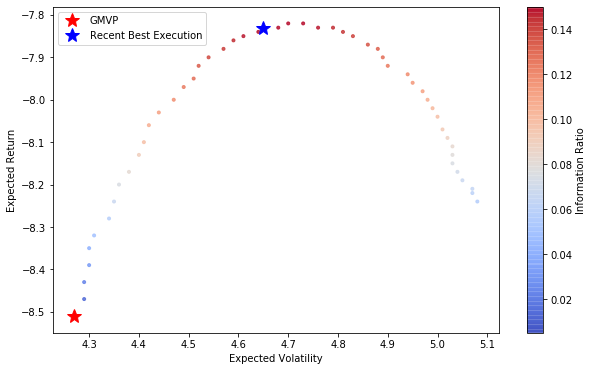

In [374]:
plt.figure(figsize=(10,6))

# Scatter plot all the possible portfolios
plt.scatter(df_buyer_strategy1_ex_eval["StandardDeviation"], df_buyer_strategy1_ex_eval["PortfolioReturn"], c=df_buyer_strategy1_ex_eval["InformationRatio"], marker='.', alpha=0.8, cmap='coolwarm')

# Pick up the portfolios on the global minimum variance portfolio
std_min = df_buyer_strategy1_ex_eval[df_buyer_strategy1_ex_eval["StandardDeviation"] == df_buyer_strategy1_ex_eval["StandardDeviation"].min()]
GMVP = std_min[std_min["PortfolioReturn"] == std_min["PortfolioReturn"].max()]
# Global minimum variance portfolio
plt.plot(GMVP["StandardDeviation"], GMVP["PortfolioReturn"], 'r*', markersize=15.0, label="GMVP")
print("[Global Minimum Variance Portfolio]")
print("Expected return: {}".format(GMVP["PortfolioReturn"][0]))
print("Standard deviation: {}".format(GMVP["StandardDeviation"][0]))
print("Sharp ratio: {}".format(GMVP["SharpRatio"][0]))
print("Information ratio: {}".format(GMVP["InformationRatio"][0]))

# The Best Execusion (i = 23~26)
Best = df_buyer_strategy1_ex_eval[df_buyer_strategy1_ex_eval["InformationRatio"] == df_buyer_strategy1_ex_eval["InformationRatio"].max()]
Best = Best[Best["StandardDeviation"] == Best["StandardDeviation"].min()]

plt.plot(Best["StandardDeviation"], Best["PortfolioReturn"], "b*", markersize=15.0, label="Recent Best Execution")
print("[Best Execution Portfolio]")
print("Expected return: {}".format(Best["PortfolioReturn"][0]))
print("Standard deviation: {}".format(Best["StandardDeviation"][0]))
print("Sharp ratio: {}".format(Best["SharpRatio"][0]))
print("Information ratio: {}".format(Best["InformationRatio"][0]))

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Information Ratio')
plt.legend(loc="upper left");

In [376]:
GMVP

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
Exec+0%,-8.51,4.27,-0.01,-150.0,-1.99,0.005


In [375]:
Best

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
Exec+23%,-7.83,4.65,-0.01,-150.0,-1.68,0.15


[Benchmark] Buyerのケースのリターンについてはもう少し検討が必要<p>
    
Efficient frontier: PortfolioReturn < 8.24 <p>
Min_SharpRatio = 1.87

## Strategy 2 (Trading with prediction after DA)

### Required dataset

In [377]:
# Need predicted price after DA market and spot price
df_buyer_strategy2 = df_prediction_afterDA.copy()

# Make lists for price information
Spot_list = list(df_buyer_strategy2["Spot"])
Low_list = list(df_buyer_strategy2["Low"])
Close_list = list(df_buyer_strategy2["Close"])
Pred_list_i = list(df_buyer_strategy2["Close_pred"])
# Judge_success = []
                   
# list for executed orders
Executed_i = []
# list for checking the execution results
Judge_i = []    
                   
# Calculate executed price
for l, c, p in zip(Low_list, Close_list, Pred_list_i):     
    # Trade on Intra markets
    if p >= l:
        Executed_i.append(p)
        Judge_i.append("True")
    else:
        Executed_i.append(c)
        Judge_i.append("False")                 

df_buyer_strategy2["ExecutedOrder"] = pd.Series(Executed_i)
df_buyer_strategy2["Judge"] = pd.Series(Judge_i)

In [386]:
df_buyer_strategy2.head()

,DateTime,Spot,High,Low,Close,Close_pred,ExecutedOrder,Judge
0,2017-08-10 00:00:00,7.98,12.98,5.94,9.4,7.60,7.60,True
1,2017-08-10 00:30:00,7.67,12.67,5.63,9.4,7.55,7.55,True
2,2017-08-10 01:00:00,6.86,11.86,5.58,9.4,7.27,7.27,True
3,2017-08-10 01:30:00,6.58,11.58,4.91,9.4,6.67,6.67,True
4,2017-08-10 02:00:00,6.62,11.62,4.88,9.4,6.72,6.72,True


### Evaluation

In [391]:
portfolio_weights= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

cols = []

PortfolioReturn = []
StandardDeviation = []
Max = []
Min = []
SharpRatio = []
InformationRatio = []

Spot_list = list(df_buyer_strategy2["Spot"])
Exec_list = list(df_buyer_strategy2["ExecutedOrder"])

for weight in portfolio_weights:
    Return = []
    for spot, intra in zip(Spot_list, Exec_list):
        # DA market 100%
        if weight == 1.0:
            Return.append(-spot*weight)
        # Trade both on DA and Intra day
        else:
            Return.append(-spot*weight + -intra*(1-weight))
    # Set colmun name
    cols.append("DA" + str(weight*100) + "%")

    # Results
    Return = pd.Series(Return)
    PortfolioReturn.append(Return.mean().round(2))
    StandardDeviation.append(Return.std().round(2))
    Max.append(Return.max().round(2))
    Min.append(Return.min().round(2))
    SharpRatio.append((Return.mean()/Return.std()).round(2))
    InformationRatio.append(round((Return - Benchmark_buyer).mean() / (Return - Benchmark_buyer).std(), 3))

#df_portfolio_benchの列を設定し、行列を入替えて調整する
df_buyer_strategy2_eval = pd.DataFrame()
df_buyer_strategy2_eval = df_buyer_strategy2_eval.T

#各算出結果をdf_portfolio_benchの列へ追加する
df_buyer_strategy2_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
df_buyer_strategy2_eval["StandardDeviation"] = pd.Series(StandardDeviation)
df_buyer_strategy2_eval["Max"] = pd.Series(Max)
df_buyer_strategy2_eval["Min"] = pd.Series(Min)
df_buyer_strategy2_eval["SharpRatio"] = pd.Series(SharpRatio)
df_buyer_strategy2_eval["InformationRatio"] = pd.Series(InformationRatio)

df_buyer_strategy2_eval.index = cols

In [392]:
df_buyer_strategy2_eval

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA0%,-8.44,4.18,-0.15,-150.00,-2.02,0.022
DA10.0%,-8.45,4.19,-0.14,-139.70,-2.02,0.020
DA20.0%,-8.46,4.20,-0.12,-129.41,-2.01,0.018
DA30.0%,-8.47,4.22,-0.11,-119.11,-2.00,0.015
DA40.0%,-8.47,4.25,-0.09,-108.82,-1.99,0.013
DA50.0%,-8.48,4.28,-0.08,-98.52,-1.98,0.011
DA60.0%,-8.49,4.32,-0.07,-88.22,-1.97,0.008
DA70.0%,-8.50,4.36,-0.05,-78.95,-1.95,0.006
DA80.0%,-8.51,4.40,-0.04,-79.30,-1.93,0.004
DA90.0%,-8.52,4.45,-0.02,-79.65,-1.91,0.002


[Global Minimum Variance Portfolio]
Expected return: -8.44
Standard deviation: 4.18
Sharp ratio: -2.02
Information ratio: 0.022
[Best Execution Portfolio]
Expected return: -8.44
Standard deviation: 4.18
Sharp ratio: -2.02
Information ratio: 0.022


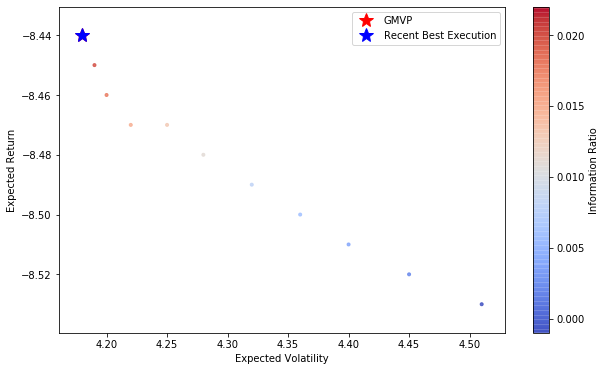

In [394]:
plt.figure(figsize=(10,6))

# Scatter plot all the possible portfolios
plt.scatter(df_buyer_strategy2_eval["StandardDeviation"], df_buyer_strategy2_eval["PortfolioReturn"], c=df_buyer_strategy2_eval["InformationRatio"], marker='.', alpha=0.8, cmap='coolwarm')

# Pick up the portfolios on the global minimum variance portfolio
std_min = df_buyer_strategy2_eval[df_buyer_strategy2_eval["StandardDeviation"] == df_buyer_strategy2_eval["StandardDeviation"].min()]
GMVP = std_min[std_min["PortfolioReturn"] == std_min["PortfolioReturn"].min()]
# Global minimum variance portfolio
plt.plot(GMVP["StandardDeviation"], GMVP["PortfolioReturn"], 'r*', markersize=15.0, label="GMVP")
print("[Global Minimum Variance Portfolio]")
print("Expected return: {}".format(GMVP["PortfolioReturn"][0]))
print("Standard deviation: {}".format(GMVP["StandardDeviation"][0]))
print("Sharp ratio: {}".format(GMVP["SharpRatio"][0]))
print("Information ratio: {}".format(GMVP["InformationRatio"][0]))

# The Best Execusion
Best = df_buyer_strategy2_eval[df_buyer_strategy2_eval["InformationRatio"] == df_buyer_strategy2_eval["InformationRatio"].max()]
# Best = Best[Best["StandardDeviation"] == Best["StandardDeviation"].min()]

plt.plot(Best["StandardDeviation"], Best["PortfolioReturn"], "b*", markersize=15.0, label="Recent Best Execution")
print("[Best Execution Portfolio]")
print("Expected return: {}".format(Best["PortfolioReturn"][0]))
print("Standard deviation: {}".format(Best["StandardDeviation"][0]))
print("Sharp ratio: {}".format(Best["SharpRatio"][0]))
print("Information ratio: {}".format(Best["InformationRatio"][0]))

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Information Ratio')
plt.legend(loc="upper right");

In [395]:
GMVP

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA0%,-8.44,4.18,-0.15,-150.0,-2.02,0.022


In [396]:
Best

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA0%,-8.44,4.18,-0.15,-150.0,-2.02,0.022


## Strategy 2 with execution strategy

### Required dataset

In [397]:
# Need predicted price after DA market and spot price
df_buyer_strategy2_ex = df_prediction_beforeDA.copy()

# Make lists for price information
Spot_list = list(df_buyer_strategy2_ex["Spot"])
Low_list = list(df_buyer_strategy2_ex["Low"])
Close_list = list(df_buyer_strategy2_ex["Close"])
# Judge_success = []

# Order and execution with execusion range
for i in list(range(0, 51, 1)):
    # list for executed orders
    Executed_i = []
    # list for checking the execution results
    Judge_i = []    
    # Derive the predicted price with the range
    Pred_list_i = list((df_buyer_strategy2_ex["Close_pred"]* (1 - i/100)).round(2))
    for l, c, p in zip(Low_list, Close_list, Pred_list_i):     
        # Trade on Intra markets
        if p >= l:
            Executed_i.append(p)
            Judge_i.append("True")
        else:
            Executed_i.append(c)
            Judge_i.append("False")                 
                
    df_buyer_strategy2_ex["Exec_" + str(i) + "%"] = pd.Series(Executed_i)
    df_buyer_strategy2_ex["Judge_" + str(i) + "%"] = pd.Series(Judge_i)

#     Judge_success.append((df_seller_bench["Judge_" + str(i) + "%"] == 'True').sum())
# #For graph
# Judge_success = pd.Series(Judge_success)

In [398]:
df_buyer_strategy2_ex.head()

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred,Exec_0%,Judge_0%,Exec_1%,Judge_1%,Exec_2%,Judge_2%,Exec_3%,Judge_3%,Exec_4%,Judge_4%,Exec_5%,Judge_5%,Exec_6%,Judge_6%,Exec_7%,Judge_7%,Exec_8%,Judge_8%,Exec_9%,Judge_9%,Exec_10%,Judge_10%,Exec_11%,Judge_11%,Exec_12%,Judge_12%,Exec_13%,Judge_13%,Exec_14%,Judge_14%,Exec_15%,Judge_15%,Exec_16%,Judge_16%,Exec_17%,Judge_17%,Exec_18%,Judge_18%,Exec_19%,Judge_19%,Exec_20%,Judge_20%,Exec_21%,Judge_21%,Exec_22%,Judge_22%,Exec_23%,Judge_23%,Exec_24%,Judge_24%,Exec_25%,Judge_25%,Exec_26%,Judge_26%,Exec_27%,Judge_27%,Exec_28%,Judge_28%,Exec_29%,Judge_29%,Exec_30%,Judge_30%,Exec_31%,Judge_31%,Exec_32%,Judge_32%,Exec_33%,Judge_33%,Exec_34%,Judge_34%,Exec_35%,Judge_35%,Exec_36%,Judge_36%,Exec_37%,Judge_37%,Exec_38%,Judge_38%,Exec_39%,Judge_39%,Exec_40%,Judge_40%,Exec_41%,Judge_41%,Exec_42%,Judge_42%,Exec_43%,Judge_43%,Exec_44%,Judge_44%,Exec_45%,Judge_45%,Exec_46%,Judge_46%,Exec_47%,Judge_47%,Exec_48%,Judge_48%,Exec_49%,Judge_49%,Exec_50%,Judge_50%
0,2017-08-10,1,10.70,12.98,5.94,9.4,8.19,8.10,2017-08-10 00:00:00,7.66,7.66,True,7.58,True,7.51,True,7.43,True,7.35,True,7.28,True,7.20,True,7.12,True,7.05,True,6.97,True,6.89,True,6.82,True,6.74,True,6.66,True,6.59,True,6.51,True,6.43,True,6.36,True,6.28,True,6.20,True,6.13,True,6.05,True,5.97,True,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False
1,2017-08-10,2,6.89,12.67,5.63,9.4,8.04,8.00,2017-08-10 00:30:00,7.41,7.41,True,7.34,True,7.26,True,7.19,True,7.11,True,7.04,True,6.97,True,6.89,True,6.82,True,6.74,True,6.67,True,6.59,True,6.52,True,6.45,True,6.37,True,6.30,True,6.22,True,6.15,True,6.08,True,6.00,True,5.93,True,5.85,True,5.78,True,5.71,True,5.63,True,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False
2,2017-08-10,3,6.42,11.86,5.58,9.4,7.93,8.05,2017-08-10 01:00:00,7.37,7.37,True,7.30,True,7.22,True,7.15,True,7.08,True,7.00,True,6.93,True,6.85,True,6.78,True,6.71,True,6.63,True,6.56,True,6.49,True,6.41,True,6.34,True,6.26,True,6.19,True,6.12,True,6.04,True,5.97,True,5.90,True,5.82,True,5.75,True,5.67,True,5.60,True,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.40,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False
3,2017-08-10,4,10.30,11.58,4.91,9.4,7.73,7.80,2017-08-10 01:30:00,7.09,7.09,True,7.02,True,6.95,True,6.88,True,6.81,True,6.74,True,6.66,True,6.59,True,6.52,True,6.45,True,6.38,True,6.31,True,6.24,True,6.17,True,6.10,True,6.03,True,5.96,True,5.88,True,5.81,True,5.74,True,5.67,True,5.60,True,5.53,True,5.46,True,5.39,True,5.32,True,5.25,True,5.18,True,5.10,True,5.03,True,4.96,True,9.40,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False
4,2017-08-10,5,10.50,11.62,4.88,9.4,7.93,7.94,2017-08-10 02:00:00,7.16,7.16,True,7.09,True,7.02,True,6.95,True,6.87,True,6.80,True,6.73,True,6.66,True,6.59,True,6.52,True,6.44,True,6.37,True,6.30,True,6.23,True,6.16,True,6.09,True,6.01,True,5.94,True,5.87,True,5.80,True,5.73,True,5.66,True,5.58,True,5.51,True,5.44,True,5.37,True,5.30,True,5.23,True,5.16,True,5.08,True,5.01,True,4.94,True,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False,9.4,False


### Evaluation

- Look for the best execution

In [408]:
n_splits=100

train_size = df_buyer_strategy2_ex.index[-1]
train_index_list = list(np.linspace(train_size/n_splits, train_size, n_splits, endpoint = True, dtype='int'))
train_index_list

# # Confirming the split logic
# for train_index in train_index_list:
#     # Divide the train/valid set  into 10 folds and pick up it.
#     X_train = df_buyer_strategy2_ex.iloc[:train_index]
#     print("TRAIN:", train_index)

[595,
 1190,
 1785,
 2380,
 2975,
 3571,
 4166,
 4761,
 5356,
 5951,
 6547,
 7142,
 7737,
 8332,
 8927,
 9523,
 10118,
 10713,
 11308,
 11903,
 12498,
 13094,
 13689,
 14284,
 14879,
 15474,
 16070,
 16665,
 17260,
 17855,
 18450,
 19046,
 19641,
 20236,
 20831,
 21426,
 22022,
 22617,
 23212,
 23807,
 24402,
 24997,
 25593,
 26188,
 26783,
 27378,
 27973,
 28569,
 29164,
 29759,
 30354,
 30949,
 31545,
 32140,
 32735,
 33330,
 33925,
 34521,
 35116,
 35711,
 36306,
 36901,
 37496,
 38092,
 38687,
 39282,
 39877,
 40472,
 41068,
 41663,
 42258,
 42853,
 43448,
 44044,
 44639,
 45234,
 45829,
 46424,
 47020,
 47615,
 48210,
 48805,
 49400,
 49995,
 50591,
 51186,
 51781,
 52376,
 52971,
 53567,
 54162,
 54757,
 55352,
 55947,
 56543,
 57138,
 57733,
 58328,
 58923,
 59519]

In [409]:
BestExec_S = []
BestExec_I = []

for train_index in train_index_list:
    X_train = df_buyer_strategy2_ex[:train_index]

    Spot_list = list(X_train["Spot"])

    portfolio_weights= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    execution_buffers = list(range(0, 51, 1))

    cols = []

    PortfolioReturn = []
    StandardDeviation = []
    Max = []
    Min = []
    SharpRatio = []
    InformationRatio = []
    
    for i in execution_buffers:
        Exec_list = list(X_train["Exec_" + str(i) + "%"])
        for weight in portfolio_weights:
            Return = []
            for spot, intra in zip(Spot_list, Exec_list):
                # DA market 100%
                if weight == 1.0:
                    Return.append(-spot*weight)
                # Trade both on DA and Intra day
                else:
                    Return.append(-spot*weight + -intra*(1-weight))
            # Set colmun name for execution buffer
            if weight == 1.0:
                cols.append(str(0))
            else:
                cols.append(str(i))

            # Results
            Return = pd.Series(Return)
            PortfolioReturn.append(Return.mean().round(2))
            StandardDeviation.append(Return.std().round(2))
            Max.append(Return.max().round(2))
            Min.append(Return.min().round(2))
            SharpRatio.append((Return.mean()/Return.std()).round(2))
            InformationRatio.append(round((Return - Benchmark_buyer).mean() / (Return - Benchmark_buyer).std(), 3))

    #df_portfolio_benchの列を設定し、行列を入替えて調整する
    df_buyer_strategy2_ex_eval = pd.DataFrame()
    df_buyer_strategy2_ex_eval = df_buyer_strategy2_ex_eval.T

    #各算出結果をdf_portfolio_benchの列へ追加する
    df_buyer_strategy2_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
    df_buyer_strategy2_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
    df_buyer_strategy2_ex_eval["Max"] = pd.Series(Max)
    df_buyer_strategy2_ex_eval["Min"] = pd.Series(Min)
    df_buyer_strategy2_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
    df_buyer_strategy2_ex_eval["InformationRatio"] = pd.Series(InformationRatio)
    
    df_buyer_strategy2_ex_eval.index = cols
    df_buyer_strategy2_ex_eval =  df_buyer_strategy2_ex_eval.reset_index()
    df_buyer_strategy2_ex_eval = df_buyer_strategy2_ex_eval.rename(columns={"index": "ExecBuffer(%)"})

    BestExec_S.append(df_buyer_strategy2_ex_eval["ExecBuffer(%)"][df_buyer_strategy2_ex_eval["SharpRatio"] == df_buyer_strategy2_ex_eval["SharpRatio"].max()].max())
    BestExec_I.append(df_buyer_strategy2_ex_eval["ExecBuffer(%)"][df_buyer_strategy2_ex_eval["InformationRatio"] == df_buyer_strategy2_ex_eval["InformationRatio"].max()].max())

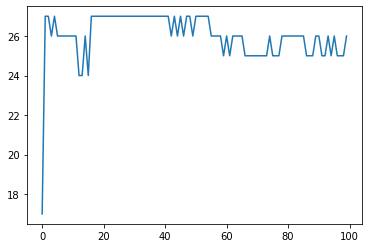

In [412]:
# BestExec = pd.Series(BestExec)
BestExec = pd.Series(BestExec_I).astype(int)
BestExec.plot()

In [413]:
BestExec[-5:]

95    26
96    25
97    25
98    25
99    26
dtype: int64

- Plot all the possible portfolios

In [418]:
Spot_list = list(X_train["Spot"])

portfolio_weights= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
execution_buffers = list(range(0, 51, 1))

cols = []

PortfolioReturn = []
StandardDeviation = []
Max = []
Min = []
SharpRatio = []
InformationRatio = []

for i in execution_buffers:
    Exec_list = list(X_train["Exec_" + str(i) + "%"])
    for weight in portfolio_weights:
        Return = []
        for spot, intra in zip(Spot_list, Exec_list):
            # DA market 100%
            if weight == 1.0:
                Return.append(-spot*weight)
            # Trade both on DA and Intra day
            else:
                Return.append(-spot*weight + -intra*(1-weight))
        # Set colmun name for execution buffer
        if weight == 1.0:
            cols.append("DA100%")
        else:
            cols.append("DA" + str(weight*100) + "%_Exec+" + str(i) + "%")

        # Results
        Return = pd.Series(Return)
        PortfolioReturn.append(Return.mean().round(2))
        StandardDeviation.append(Return.std().round(2))
        Max.append(Return.max().round(2))
        Min.append(Return.min().round(2))
        SharpRatio.append((Return.mean()/Return.std()).round(2))
        InformationRatio.append(((Return - Benchmark_buyer).mean()/(Return - Benchmark_buyer).std()).round(3))

#df_portfolio_benchの列を設定し、行列を入替えて調整する
df_buyer_strategy2_ex_eval = pd.DataFrame()
df_buyer_strategy2_ex_eval = df_buyer_strategy2_ex_eval.T

#各算出結果をdf_portfolio_benchの列へ追加する
df_buyer_strategy2_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
df_buyer_strategy2_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
df_buyer_strategy2_ex_eval["Max"] = pd.Series(Max)
df_buyer_strategy2_ex_eval["Min"] = pd.Series(Min)
df_buyer_strategy2_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
df_buyer_strategy2_ex_eval["InformationRatio"] = pd.Series(InformationRatio)

df_buyer_strategy2_ex_eval.index = cols
# df_buyer_strategy2_ex_eval =  df_buyer_strategy2_ex_eval.reset_index()
# df_buyer_strategy2_ex_eval = df_buyer_strategy2_ex_eval.rename(columns={"index": "ExecBuffer(%)"})

In [425]:
df_buyer_strategy2_ex_eval

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA0%_Exec+0%,-8.73,4.14,-1.25,-150.00,-2.11,-0.047
DA10.0%_Exec+0%,-8.78,4.14,-1.25,-140.00,-2.12,-0.061
DA20.0%_Exec+0%,-8.84,4.16,-1.11,-130.00,-2.12,-0.074
DA30.0%_Exec+0%,-8.89,4.21,-0.98,-120.00,-2.11,-0.086
DA40.0%_Exec+0%,-8.95,4.29,-0.84,-110.00,-2.09,-0.098
...,...,...,...,...,...,...
DA60.0%_Exec+50%,-8.87,4.81,-0.29,-89.99,-1.84,-0.071
DA70.0%_Exec+50%,-8.97,4.87,-0.22,-79.99,-1.84,-0.091
DA80.0%_Exec+50%,-9.08,4.95,-0.15,-77.08,-1.83,-0.111
DA90.0%_Exec+50%,-9.18,5.06,-0.08,-76.09,-1.81,-0.129


In [419]:
df_buyer_strategy2_ex_eval[df_buyer_strategy2_ex_eval["InformationRatio"] == df_buyer_strategy2_ex_eval["InformationRatio"].max()]

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA0%_Exec+23%,-7.83,4.64,-0.96,-150.0,-1.69,0.15
DA0%_Exec+24%,-7.83,4.67,-0.95,-150.0,-1.68,0.15
DA0%_Exec+25%,-7.83,4.69,-0.94,-150.0,-1.67,0.15
DA0%_Exec+26%,-7.82,4.72,-0.92,-150.0,-1.66,0.15


[Global Minimum Variance Portfolio: DA10.0%_Exec+0%]
Expected return: -8.78
Standard deviation: 4.14
Information Ratio: -0.061
[Best Execution Portfolio: DA0%_Exec+23%]
Expected return: -7.83
Standard deviation: 4.64
Sharp ratio: -1.69
Information ratio: 0.15


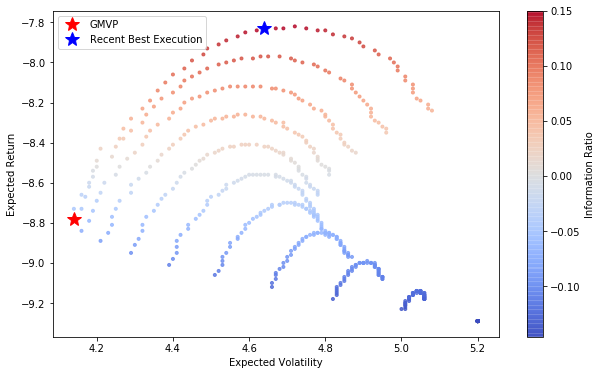

In [424]:
plt.figure(figsize=(10,6))

# Scatter plot all the possible portfolios
plt.scatter(df_buyer_strategy2_ex_eval["StandardDeviation"], df_buyer_strategy2_ex_eval["PortfolioReturn"], c=df_buyer_strategy2_ex_eval["InformationRatio"], marker='.', alpha=0.8, cmap='coolwarm')

# Pick up the portfolios on the global minimum variance portfolio
std_min = df_buyer_strategy2_ex_eval[df_buyer_strategy2_ex_eval["StandardDeviation"] == df_buyer_strategy2_ex_eval["StandardDeviation"].min()]
GMVP = std_min[std_min["PortfolioReturn"] == std_min["PortfolioReturn"].min()]
# Global minimum variance portfolio
plt.plot(GMVP["StandardDeviation"], GMVP["PortfolioReturn"], 'r*', markersize=15.0, label="GMVP")
print("[Global Minimum Variance Portfolio: " + str(GMVP.index[0]) + "]")
print("Expected return: {}".format(GMVP["PortfolioReturn"][0]))
print("Standard deviation: {}".format(GMVP["StandardDeviation"][0]))
print("Information Ratio: {}".format(GMVP["InformationRatio"][0]))

# The Best Execusion
DA_weight = 0
i = 21
Best = df_buyer_strategy2_ex_eval[df_buyer_strategy2_ex_eval["InformationRatio"] == df_buyer_strategy2_ex_eval["InformationRatio"].max()]
Best = Best[Best["StandardDeviation"] == Best["StandardDeviation"].min()]

plt.plot(Best["StandardDeviation"], Best["PortfolioReturn"], "b*", markersize=15.0, label="Recent Best Execution")
print("[Best Execution Portfolio: " + str(Best.index[0]) + "]" )
print("Expected return: {}".format(Best["PortfolioReturn"][0]))
print("Standard deviation: {}".format(Best["StandardDeviation"][0]))
print("Sharp ratio: {}".format(Best["SharpRatio"][0]))
print("Information ratio: {}".format(Best["InformationRatio"][0]))

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Information Ratio')
plt.legend(loc="upper left");

In [422]:
GMVP

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA10.0%_Exec+0%,-8.78,4.14,-1.25,-140.0,-2.12,-0.061


In [423]:
Best

,PortfolioReturn,StandardDeviation,Max,Min,SharpRatio,InformationRatio
DA0%_Exec+23%,-7.83,4.64,-0.96,-150.0,-1.69,0.15


# For Trader (Execution strategyは考慮しない)

## Purpose & Assumption
[Purpose]
- Intradayの優位性は示せたが、流動性がネックになる
- Virtual biddingの必要性について議論する (U.Sの導入前後の取引量推移があれば完璧)
 --> つまりExecution strategyの感度分析はここでは必要ない
 --> 各30分商品それぞれの特徴を追うほうが有意義


[Assumption]
- TraderはPrice-takerであり、Priceに影響を与えないこと
- Tokyo areaで限定 (System priceは取引不可のため)
- 使用するデータは1 day lag Spot（Tokyo area）, Close Price
- 売買数量については設定できないため、価格の差分のみでリターンとリスクを評価する (手数料も無視)
- 板情報が入手できないのでアイスバーグ方式は無視(https://www.emsc.meti.go.jp/activity/emsc_system/pdf/051_06_00.pdf P.8)
- 全ての注文は約定できるものと仮定する (インバランスでのペナルティは考慮しない)
- 下記裁定トレーディングを実施するためには、EMHの仮定を棄却する必要がある <p>
    --> そのためには各商品の自己相関を確認しておく　-->価格予測Noteの "Close priceのEDAパートもしくはSARIMAパート"参照 <p>
    --> 論文では　"combination of the GARCH and Ljung-Box methods"で2015年のSpot, Intra priceを両方検証し、棄却に成功している(４タイムスロットの日足データ)<p>
    -->各タイムスロットの年間のデータはSpotもIntraも入手可能<p>
    -->ただ、１年間のみ４スロットの検証で事足りるのか？？<p>
    -->他に考えられる検証はないか。。。？<p>

-　Spotで買い/売りを仕掛け、Intraで全ポジション反対決裁 --> 取引数量は無視 (1単位のみ)
- 各時間別商品別個別で仕掛けるポジションを判定
- 手仕舞い時のみ指値を活用

※　JEPXの取引フローを調べておく (論文では約定フローとルールについて図解してある)
※　論文では単純にSpotとIntraの価格差を損益として、年間の取引数Nを集計ししている

(Reference) 
オリジナリティが強すぎるのでなにか参考文献を見つけておく

- "Trading Techniques for European Electricity Markets" (例の修論)

- "Speculative Trading and Market Performance: The Effect of Arbitrageurs on Efficiency and Market Power in the New York Electricity Market (2003)"
https://escholarship.org/content/qt0mx44472/qt0mx44472_noSplash_3bb91c9ed710e4c77dffa5caf1a6512b.pdf?t=krnn5f

## Trading without execution strategy

### Required dataset
[Logic of trading without prediction: Benchmark]
- None because this strategy cannot be carried out without prediction

[Logic of trading with predicition]
- Concept is trading based on the price difference between spot price and intraday close price
- At first, entry position is decided based on the 1 day lagged spot price(Spot) and the predicted intraday close price(Close)
    --> Spot > Close: Entry with sell position on DA market
    --> Spot < Close: Entry with buy positioin on DA market
- Close all the position with reversing trade on Intraday market, ordering with execution buffer

In [556]:
df_trader = df_prediction_beforeDA.copy()
df_trader["Date"] = pd.to_datetime(df_trader["Date"])
df_trader["DateTime"] = pd.to_datetime(df_trader["DateTime"])

In [557]:
df_trader.head()

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred
0,2017-08-10,1,10.70,12.98,5.94,9.4,8.19,8.10,2017-08-10 00:00:00,7.66
1,2017-08-10,2,6.89,12.67,5.63,9.4,8.04,8.00,2017-08-10 00:30:00,7.41
2,2017-08-10,3,6.42,11.86,5.58,9.4,7.93,8.05,2017-08-10 01:00:00,7.37
3,2017-08-10,4,10.30,11.58,4.91,9.4,7.73,7.80,2017-08-10 01:30:00,7.09
4,2017-08-10,5,10.50,11.62,4.88,9.4,7.93,7.94,2017-08-10 02:00:00,7.16


### Evaluation

以下の算出式を整理しておく (基本的にはベース論文を参考にする)
- Return = 各48商品の| Pintra_actual - Pspot |についての合計

- Standard Deviation
    -->Intra priceとSpot priceのStandard deviationを算出し、Weightに応じて算出
 
- Sharp-ratio
    -->上記RerurnとStandard deviationから算出する -->超過リターンを計測し、トレーディングの可能性を示す
    
- VaR　=[Expected Weighted Return of the Portfolio − (z-score of the confidence interval × standard deviation of the portfolio)] × portfolio value

- 検証期間の全商品を個別にEntry/close positionのロジックを構築し、リターンを算出する (縦軸：全３０分値商品,　横軸: Date, HH, リターン )
- 48商品を横軸、年月日を縦軸のテーブルにピポットし、値にリターンを当てはめて日別で期間集計する (縦軸：年月日, 横軸：各商品のリターン)
- テーブルに各指標の日別集計を差し込む <p>
- 線グラフ化で累計リターンの推移を確認 <p>
- リターンの分布を確認できる (テールリスクについてもざっくり見られる) <p>
- テールリスクについてはVaRで掘り下げていく <p>
    
※Traderの戦略についてはBenchmarkとの比較ではなく、単純に超過リターンがでた上で、ドローダウンが現実的な範囲内であれば勝ちとしたい

In [558]:
# For execution
LaggedSpot_list = list(df_trader["Spot_1daylag"])
Pred_list = list(df_trader["Close_pred"])
Close_list = list(df_trader["Close"])
High_list = list(df_trader["High"])
Low_list = list(df_trader["Low"])

# For evaluation
Spot_list = list(df_trader["Spot"])

# 算出結果を格納するリスト
cols = []

Return = [] 
PortfolioReturn = []
StandardDeviation = []
Max = []
Min = []
SharpRatio = []

#一旦は指値バッファなしで組んでみる
for spot, lag_spot, pred, high, low, close in zip(Spot_list,LaggedSpot_list, Pred_list, High_list, Low_list, Close_list):
    #　Buy-in, Sell-out　※ Decision based on lag_spot and pred
    if lag_spot < pred:
        #Returnを格納 ※ Evaluation based on spot and pred/close
        #約定成功
        if pred < high:
            Return.append(round(pred - spot, 4))
        #約定失敗
        else:
            Return.append(round(close - spot, 4))
            
    # Sell-in, Buy-out ※ Decision based on lag_spot and pred
    elif lag_spot > pred:
        #Returnを格納 ※ Evaluation based on spot and pred/close
        #約定成功
        if pred > low:
            Return.append(round(spot - pred, 4))
        #約定失敗
        else:
            Return.append(round(spot - close, 4))
    # lag_spot is the same as pred --> No trade
    else:
        Return.append(0)

df_trader_eval = pd.DataFrame()
df_trader_eval["DateTime"] = df_trader["DateTime"]
df_trader_eval["HH"] = df_trader["HH"]
df_trader_eval["Date"] = df_trader["Date"]
df_trader_eval["Return"] = pd.Series(Return)

- まずは全商品でのパフォーマンスを見てみる

In [559]:
df_trader_eval.head()

,DateTime,HH,Date,Return
0,2017-08-10 00:00:00,1,2017-08-10,0.53
1,2017-08-10 00:30:00,2,2017-08-10,0.63
2,2017-08-10 01:00:00,3,2017-08-10,0.56
3,2017-08-10 01:30:00,4,2017-08-10,0.64
4,2017-08-10 02:00:00,5,2017-08-10,0.77


In [560]:
#valuesの値を変えれば別のポートフォリオの集計もできる
df_trader_portfolio_table = pd.DataFrame(df_trader_eval.pivot(index='Date', columns='HH', values='Return'))

In [561]:
df_trader_portfolio_table["Expected_Return"] = df_trader_portfolio_table.loc[: , 0:48].mean(axis=1).round(2)
df_trader_portfolio_table["StandardDeviation"] = df_trader_portfolio_table.loc[: , 1:48].std(axis=1).round(2)
df_trader_portfolio_table["Max"] = df_trader_portfolio_table.loc[: , 1:48].max(axis=1).round(2)
df_trader_portfolio_table["Min"] = df_trader_portfolio_table.loc[: , 1:48].min(axis=1).round(2)
df_trader_portfolio_table["SharpRatio"] = (df_trader_portfolio_table.loc[: , 1:48].mean(axis=1)/df_trader_portfolio_table.loc[: , 1:48].std(axis=1)).round(2)

In [562]:
# 各商品別にドローダウンを算出 ()
risk = pd.DataFrame()

risk["Expected_Return"] = df_trader_portfolio_table.loc[: , 1:48].mean(axis=1).round(2)
# risk["StandardDeviation"] = df_trader_portfolio_table.loc[: , 1:48].std(axis=1).round(2)
# risk["Max"] = df_trader_portfolio_table.loc[: , 1:48].max(axis=1).round(2)
# risk["Min"] = df_trader_portfolio_table.loc[: , 1:48].min(axis=1).round(2)
risk["equity"] = risk['Expected_Return'].cumsum()
risk["cummax"] = risk["equity"].cummax()
risk["drawdown"] = -(risk["cummax"] -risk["equity"])
risk.head()


# Max_drawdownを算出して並べる
max_drawdown = risk["drawdown"].min()
print(max_drawdown)

-29.63000000000011


In [563]:
risk.head()

,Expected_Return,equity,cummax,drawdown
Date,,,,
2017-08-10,3.55,3.55,3.55,-0.00
2017-08-11,-2.19,1.36,3.55,-2.19
2017-08-12,-0.23,1.13,3.55,-2.42
2017-08-13,1.01,2.14,3.55,-1.41
2017-08-14,0.42,2.56,3.55,-0.99


In [564]:
risk[-1:]["cummax"][0]

724.49

In [565]:
t_max = pd.to_datetime(risk["drawdown"].idxmin())
t_max

Timestamp('2020-12-31 00:00:00')

Expected_Return: 0.56
StandardDeviation: 1.85
SharpRatio: 0.3
Cum_Return: 694.86
Drawdown: -29.63


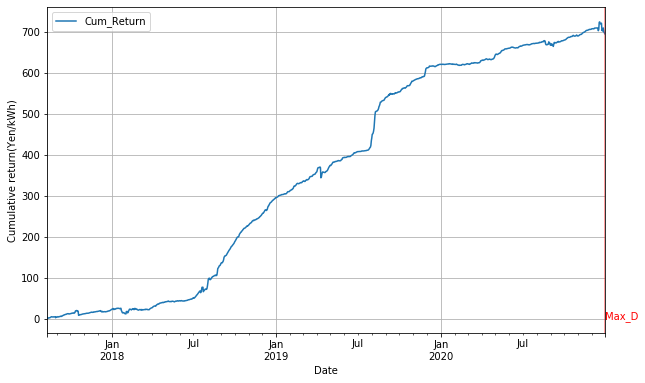

In [566]:
fig, ax = plt.subplots(1, figsize=(15,8))
# plt.title('Cumulative return through trading based on the difference of price on DA and Intraday')

risk["equity"].plot(figsize=(10, 6), label="Cum_Return")

plt.text(t_max, 0, 'Max_D', rotation=0, color="r")

print("Expected_Return: " + str(risk["Expected_Return"].mean().round(2)))
print("StandardDeviation: " + str(risk["Expected_Return"].std().round(2)))
print("SharpRatio: " + str(round(risk["Expected_Return"].mean() /  risk["Expected_Return"].std(),2)))
print("Cum_Return: " + str(risk["equity"][-1:][0].round(2)))
print("Drawdown: " + str(risk["drawdown"].min().round(2)))

ax.set(xlabel="Date", ylabel="Cumulative return(Yen/kWh)")
plt.axvline(t_max, c="r", alpha=0.5)
plt.grid()
plt.legend();

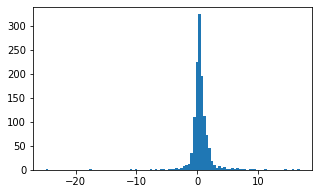

In [567]:
plt.figure(figsize=(5, 3))

plt.hist(risk['Expected_Return'], bins=100);

以下でVaRを算出

In [568]:
import scipy.stats as scs

equity = 10000000

percs = np.array([1., 5.0, 10.0])
risk["returns"] = np.log(risk["equity"] / risk["equity"].shift(1))
VaR = scs.scoreatpercentile(equity * risk["returns"], percs)
def print_var():
    print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
    print(43 * '-')
    for pair in zip(percs, VaR):
        print('%16.0f %16.0f' % (100 - pair[0], -pair[1]))

In [569]:
print_var()

Confidence Level    Value-at-Risk
-------------------------------------------
              99          1076981
              95           156009
              90            31138


VaRに関しては以下のリンクを参考にもう少し他の実装方法も試してみる

[エンジニアのための金融工学入門：Value At Risk(バリューアットリスク）]


https://recruit.gmo.jp/engineer/jisedai/blog/financial_technology_value_at_risk/

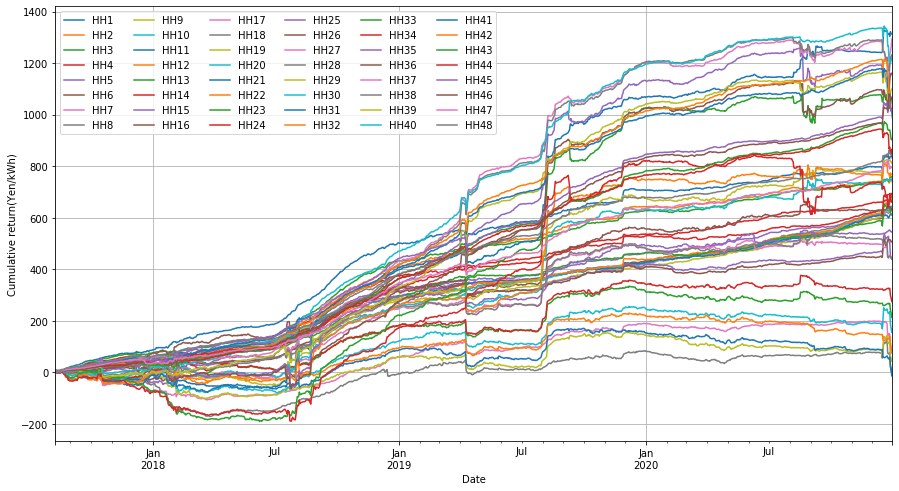

In [570]:
# 各商品の累計リターンを全てプロット
fig, ax = plt.subplots(1, figsize=(15,8))
# plt.title('Cumulative return through trading based on the difference of price on DA and Intraday')


# Portfolio別の評価指標 (縦軸:年月日、横軸：48商品 + 各指標集計)
Equity = []
ExpectedReturn = []
Max = []
Min = []
StandardDeviation = []
SharpRatio= []
CumMax = []
MaxDrawdown = []

for HH in list(range(1, 49, 1)):
#　各itemsの売り買いポジションの組み合わせをPortfolioとする
    df_trader_portfolio_table = pd.DataFrame(df_trader_eval.pivot(index='Date', columns='HH', values='Return'))
    
    # For plot and for calculating drawdown
    equity = df_trader_portfolio_table[HH].cumsum().round(2)
    # Plot the performance of each HH spot
    equity.plot(label="HH" + str(HH))
    
    # Keep in a list for calculating drawdown
    Equity.append(equity)
    cummax = equity.cummax()
    drawdown = -(cummax - equity)

    # Calculation for each evaluation on each HH slot
    HH_Return = df_trader_portfolio_table[HH].mean().round(2)
    HH_Std = df_trader_portfolio_table[HH].std().round(2)
    ExpectedReturn.append(HH_Return)
    StandardDeviation.append(HH_Std)
    Max.append(df_trader_portfolio_table[HH].max().round(2))
    Min.append(df_trader_portfolio_table[HH].min().round(2))
    SharpRatio.append((HH_Return / HH_Std).round(2))
    CumMax.append(cummax.max().round(2))
    MaxDrawdown.append(drawdown.min().round(2))

ax.set(xlabel="Date", ylabel="Cumulative return(Yen/kWh)")
plt.grid()
plt.legend(loc="upper left", ncol=6);

In [571]:
df_trader_HH_Eval = pd.DataFrame()
df_trader_HH_Eval["HH"] =  pd.Series(list(range(1,49,1)))

df_trader_HH_Eval["ExpectedReturn"]  = pd.Series(ExpectedReturn)
df_trader_HH_Eval["Max"]  = pd.Series(Max)
df_trader_HH_Eval["Min"]  = pd.Series(Min)
df_trader_HH_Eval["StandardDeviation"]  = pd.Series(StandardDeviation)
df_trader_HH_Eval["SharpRatio"]  = pd.Series(SharpRatio)
df_trader_HH_Eval["CumMax"] = pd.Series(CumMax)
df_trader_HH_Eval["MaxDrawdown"]  = pd.Series(MaxDrawdown)

In [572]:
df_trader_HH_Eval[df_trader_HH_Eval["CumMax"] == df_trader_HH_Eval["CumMax"].max()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
39,40,0.99,36.28,-61.21,4.58,0.22,1343.41,-141.69


In [573]:
df_trader_HH_Eval[df_trader_HH_Eval["SharpRatio"] == df_trader_HH_Eval["SharpRatio"].max()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
2,3,0.61,7.89,-5.96,1.25,0.49,758.94,-9.55


HH40 --> 19:30

In [574]:
df_trader_HH_Eval[df_trader_HH_Eval["CumMax"] == df_trader_HH_Eval["CumMax"].min()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
17,18,0.02,31.63,-56.72,3.48,0.01,123.22,-175.96


HH18 --> 8:30

HH33 --> 16:00

In [575]:
df_trader_HH_Eval[df_trader_HH_Eval["MaxDrawdown"] == df_trader_HH_Eval["MaxDrawdown"].max()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
5,6,0.51,17.83,-4.17,1.24,0.41,637.05,-8.98


HH6 --> 2:30

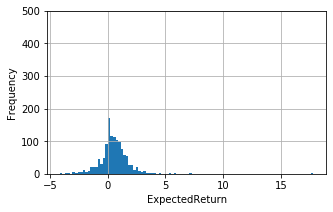

In [609]:
fig, ax = plt.subplots(1, figsize=(5,3))
plt.hist(df_trader_portfolio_table[6], bins=100)
plt.ylim(0, 500)
ax.set(xlabel="ExpectedReturn", ylabel="Frequency")
plt.grid();

In [577]:
df_trader_HH_Eval[df_trader_HH_Eval["MaxDrawdown"] == df_trader_HH_Eval["MaxDrawdown"].min()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
33,34,0.55,46.74,-100.01,6.7,0.08,843.66,-231.52


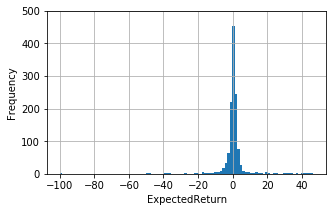

In [608]:
fig, ax = plt.subplots(1, figsize=(5,3))
df_trader_portfolio_table[34].hist(bins=100)
plt.ylim(0, 500)
ax.set(xlabel="ExpectedReturn", ylabel="Frequency");

## Trading with execution strategy

### Required dataset

In [579]:
Spot_list = list(df_trader["Spot"])
LaggedSpot_list = list(df_trader["Spot_1daylag"])
Close_list = list(df_trader["Close"])
High_list = list(df_trader["High"])
Low_list = list(df_trader["Low"])

cols = []

df_trader_ex = pd.DataFrame()
df_trader_ex["DateTime"] = df_trader["DateTime"]
df_trader_ex["HH"] = df_trader["HH"]
df_trader_ex["Date"] = df_trader["Date"]

# Just for check
df_trader_ex["Spot"] = df_trader["Spot"]
df_trader_ex["Close_pred"] = df_trader["Close_pred"]
df_trader_ex["Close"] = df_trader["Close"]

for i in list(range(-30, 31, 1)):
    Return = [] 
    Judge = []      
    Pred_list = list(round(df_trader_ex["Close_pred"]  * (1+ i/100),2))
    for spot, lag_spot, pred_ex, high, low, close in zip(Spot_list, LaggedSpot_list, Pred_list, High_list, Low_list, Close_list):
        #　Buy-in, Sell-out　※Decision based on lag_spot and pred
        if lag_spot < pred_ex:
            #※ Evaluation based on spot and pred/close
            # Success of close the position
            if pred_ex <= high:
                Return.append(pred_ex - spot)
                Judge.append("True")                
            # Failure of close the position
            else:
                Return.append(close - spot)
                Judge.append("False")                

        # Sell-in, Buy-out ※ Decision based on lag_spot and pred
        elif lag_spot > pred_ex:
            #※ Evaluation based on spot and pred/close
            # Success of close the position
            if pred_ex >= low:
                Return.append(spot - pred_ex)
                Judge.append("True")                
            # Failure of close the position
            else:
                Return.append(spot - close)
                Judge.append("False")                
        #No trade
        else:
            Return.append(0)
            Judge.append("None")                

    df_trader_ex["Return_exec" + str(i) + "%"] = pd.Series(Return)
    df_trader_ex["Judge_exec" + str(i) + "%"] = pd.Series(Judge)

In [580]:
df_trader_ex

,DateTime,HH,Date,Spot,Close_pred,Close,Return_exec-30%,Judge_exec-30%,Return_exec-29%,Judge_exec-29%,Return_exec-28%,Judge_exec-28%,Return_exec-27%,Judge_exec-27%,Return_exec-26%,Judge_exec-26%,Return_exec-25%,Judge_exec-25%,Return_exec-24%,Judge_exec-24%,Return_exec-23%,Judge_exec-23%,Return_exec-22%,Judge_exec-22%,Return_exec-21%,Judge_exec-21%,Return_exec-20%,Judge_exec-20%,Return_exec-19%,Judge_exec-19%,Return_exec-18%,Judge_exec-18%,Return_exec-17%,Judge_exec-17%,Return_exec-16%,Judge_exec-16%,Return_exec-15%,Judge_exec-15%,Return_exec-14%,Judge_exec-14%,Return_exec-13%,Judge_exec-13%,Return_exec-12%,Judge_exec-12%,Return_exec-11%,Judge_exec-11%,Return_exec-10%,Judge_exec-10%,Return_exec-9%,Judge_exec-9%,Return_exec-8%,Judge_exec-8%,Return_exec-7%,Judge_exec-7%,Return_exec-6%,Judge_exec-6%,Return_exec-5%,Judge_exec-5%,Return_exec-4%,Judge_exec-4%,Return_exec-3%,Judge_exec-3%,Return_exec-2%,Judge_exec-2%,Return_exec-1%,Judge_exec-1%,Return_exec0%,Judge_exec0%,Return_exec1%,Judge_exec1%,Return_exec2%,Judge_exec2%,Return_exec3%,Judge_exec3%,Return_exec4%,Judge_exec4%,Return_exec5%,Judge_exec5%,Return_exec6%,Judge_exec6%,Return_exec7%,Judge_exec7%,Return_exec8%,Judge_exec8%,Return_exec9%,Judge_exec9%,Return_exec10%,Judge_exec10%,Return_exec11%,Judge_exec11%,Return_exec12%,Judge_exec12%,Return_exec13%,Judge_exec13%,Return_exec14%,Judge_exec14%,Return_exec15%,Judge_exec15%,Return_exec16%,Judge_exec16%,Return_exec17%,Judge_exec17%,Return_exec18%,Judge_exec18%,Return_exec19%,Judge_exec19%,Return_exec20%,Judge_exec20%,Return_exec21%,Judge_exec21%,Return_exec22%,Judge_exec22%,Return_exec23%,Judge_exec23%,Return_exec24%,Judge_exec24%,Return_exec25%,Judge_exec25%,Return_exec26%,Judge_exec26%,Return_exec27%,Judge_exec27%,Return_exec28%,Judge_exec28%,Return_exec29%,Judge_exec29%,Return_exec30%,Judge_exec30%
0,2017-08-10 00:00:00,1,2017-08-10,8.19,7.66,9.40,-1.21,False,-1.21,False,-1.21,False,-1.21,False,-1.21,False,-1.21,False,-1.21,False,-1.21,False,2.22,True,2.14,True,2.06,True,1.99,True,1.91,True,1.83,True,1.76,True,1.68,True,1.60,True,1.53,True,1.45,True,1.37,True,1.30,True,1.22,True,1.14,True,1.07,True,0.99,True,0.91,True,0.84,True,0.76,True,0.68,True,0.61,True,0.53,True,0.45,True,0.38,True,0.30,True,0.22,True,0.15,True,-0.07,True,0.01,True,0.08,True,0.16,True,0.24,True,0.31,True,0.39,True,0.47,True,0.54,True,0.62,True,0.70,True,0.77,True,0.85,True,0.93,True,1.00,True,1.08,True,1.16,True,1.23,True,1.31,True,1.38,True,1.46,True,1.54,True,1.61,True,1.69,True,1.77,True
1,2017-08-10 00:30:00,2,2017-08-10,8.04,7.41,9.40,-1.36,False,-1.36,False,-1.36,False,-1.36,False,-1.36,False,-1.36,False,2.41,True,2.33,True,2.26,True,2.19,True,2.11,True,2.04,True,1.96,True,1.89,True,1.82,True,1.74,True,1.67,True,1.59,True,1.52,True,1.45,True,1.37,True,1.30,True,1.22,True,1.15,True,1.07,True,1.00,True,0.93,True,0.85,True,0.78,True,0.70,True,0.63,True,0.56,True,0.48,True,0.41,True,0.33,True,0.26,True,0.19,True,0.11,True,0.00,None,0.04,True,0.11,True,0.19,True,0.26,True,0.33,True,0.41,True,0.48,True,0.56,True,0.63,True,0.70,True,0.78,True,0.85,True,0.93,True,1.00,True,1.07,True,1.15,True,1.22,True,1.30,True,1.37,True,1.44,True,1.52,True,1.59,True
2,2017-08-10 01:00:00,3,2017-08-10,7.93,7.37,9.40,-1.47,False,-1.47,False,-1.47,False,-1.47,False,-1.47,False,-1.47,False,2.33,True,2.26,True,2.18,True,2.11,True,2.03,True,1.96,True,1.89,True,1.81,True,1.74,True,1.67,True,1.59,True,1.52,True,1.44,True,1.37,True,1.30,True,1.22,True,1.15,True,1.08,True,1.00,True,0.93,True,0.85,True,0.78,True,0.71,True,0.63,True,0.56,True,0.49,True,0.41,True,0.34,True,0.27,True,0.19,True,0.12,True,0.04,True,-0.03,True,-0.10,True,0.18,True,0.25,True,0.32,True,0.40,True,0.47,True,0.55,True,0.62,True,0.69,True,0.77,True,0.84,True,0.91,True,0.99,True,1.06,True,1.14,True,1.21,True,1.28,True,1.36,True,1.43,True,1.50,True,1.58,True,1.65,True
3,2017-08-10 01:30:00,4,2017-08-10,7.73,7.09,9.40,2.77,True,2.70,True,2.63,True,2.55,True,2.48,True,2.41,True,2.34,True,2.27,True,2.20,True,2.13,T

### Evaluation

In [581]:
n_splits=100

train_size = df_trader_ex.index[-1]
train_index_list = list(np.linspace(train_size/n_splits, train_size, n_splits, endpoint = True, dtype='int'))
train_index_list

# Confirming the split logic
for train_index in train_index_list:
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train = df_trader_ex.iloc[:train_index]
    print("TRAIN:", train_index)

TRAIN: 595
TRAIN: 1190
TRAIN: 1785
TRAIN: 2380
TRAIN: 2975
TRAIN: 3571
TRAIN: 4166
TRAIN: 4761
TRAIN: 5356
TRAIN: 5951
TRAIN: 6547
TRAIN: 7142
TRAIN: 7737
TRAIN: 8332
TRAIN: 8927
TRAIN: 9523
TRAIN: 10118
TRAIN: 10713
TRAIN: 11308
TRAIN: 11903
TRAIN: 12498
TRAIN: 13094
TRAIN: 13689
TRAIN: 14284
TRAIN: 14879
TRAIN: 15474
TRAIN: 16070
TRAIN: 16665
TRAIN: 17260
TRAIN: 17855
TRAIN: 18450
TRAIN: 19046
TRAIN: 19641
TRAIN: 20236
TRAIN: 20831
TRAIN: 21426
TRAIN: 22022
TRAIN: 22617
TRAIN: 23212
TRAIN: 23807
TRAIN: 24402
TRAIN: 24997
TRAIN: 25593
TRAIN: 26188
TRAIN: 26783
TRAIN: 27378
TRAIN: 27973
TRAIN: 28569
TRAIN: 29164
TRAIN: 29759
TRAIN: 30354
TRAIN: 30949
TRAIN: 31545
TRAIN: 32140
TRAIN: 32735
TRAIN: 33330
TRAIN: 33925
TRAIN: 34521
TRAIN: 35116
TRAIN: 35711
TRAIN: 36306
TRAIN: 36901
TRAIN: 37496
TRAIN: 38092
TRAIN: 38687
TRAIN: 39282
TRAIN: 39877
TRAIN: 40472
TRAIN: 41068
TRAIN: 41663
TRAIN: 42258
TRAIN: 42853
TRAIN: 43448
TRAIN: 44044
TRAIN: 44639
TRAIN: 45234
TRAIN: 45829
TRAIN: 46424
TRA

In [582]:
BestExec = []

for train_index in train_index_list:
    X_train = df_trader_ex[:train_index]
    
    cols = []

    # List for the results for evaluation
    PortfolioReturn = []
    StandardDeviation = []
    Max = []
    Min = []
    SharpRatio = []

    for i in list(range(-30, 31, 1)):
        Return_i = list(X_train["Return_exec" + str(i) + "%"]) 
        
        Return_i = pd.Series(Return_i)
        PortfolioReturn.append(Return_i.mean().round(2))
        StandardDeviation.append(Return_i.std().round(2))
        Max.append(Return_i.max().round(2))
        Min.append(Return_i.min().round(2))
        SharpRatio.append((Return_i.mean()/Return_i.std()).round(2))
        # Make columns names
        cols.append(i)

    # Make dataframe for evaluation and  switch columns and row.
    df_trader_ex_eval = pd.DataFrame()
    # df_trader_ex_eval = df_trader_ex_eval.T

    #各算出結果をdf_portfolio_benchの列へ追加する
    df_trader_ex_eval["PortfolioReturn"] = pd.Series(PortfolioReturn)
    df_trader_ex_eval["StandardDeviation"] = pd.Series(StandardDeviation)
    df_trader_ex_eval["Max"] = pd.Series(Max)
    df_trader_ex_eval["Min"] = pd.Series(Min)
    df_trader_ex_eval["SharpRatio"] = pd.Series(SharpRatio)
    df_trader_ex_eval.index = cols
    df_trader_ex_eval =  df_trader_ex_eval.reset_index()
    df_trader_ex_eval = df_trader_ex_eval.rename(columns={"index": "ExecBuffer(%)"})

    BestExec.append(df_trader_ex_eval["ExecBuffer(%)"][df_trader_ex_eval["SharpRatio"] == df_trader_ex_eval["SharpRatio"].max()].max())

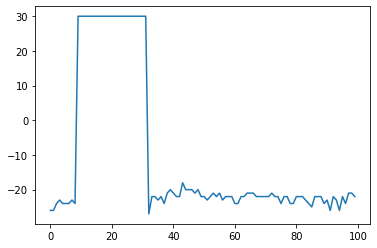

In [583]:
# The best execution of 100 different periods
BestExec = pd.Series(BestExec)
BestExec.plot();

In [584]:
BestExec.tail()

95   -22
96   -24
97   -21
98   -21
99   -22
dtype: int64

In [585]:
df_trader_ex.head()

,DateTime,HH,Date,Spot,Close_pred,Close,Return_exec-30%,Judge_exec-30%,Return_exec-29%,Judge_exec-29%,Return_exec-28%,Judge_exec-28%,Return_exec-27%,Judge_exec-27%,Return_exec-26%,Judge_exec-26%,Return_exec-25%,Judge_exec-25%,Return_exec-24%,Judge_exec-24%,Return_exec-23%,Judge_exec-23%,Return_exec-22%,Judge_exec-22%,Return_exec-21%,Judge_exec-21%,Return_exec-20%,Judge_exec-20%,Return_exec-19%,Judge_exec-19%,Return_exec-18%,Judge_exec-18%,Return_exec-17%,Judge_exec-17%,Return_exec-16%,Judge_exec-16%,Return_exec-15%,Judge_exec-15%,Return_exec-14%,Judge_exec-14%,Return_exec-13%,Judge_exec-13%,Return_exec-12%,Judge_exec-12%,Return_exec-11%,Judge_exec-11%,Return_exec-10%,Judge_exec-10%,Return_exec-9%,Judge_exec-9%,Return_exec-8%,Judge_exec-8%,Return_exec-7%,Judge_exec-7%,Return_exec-6%,Judge_exec-6%,Return_exec-5%,Judge_exec-5%,Return_exec-4%,Judge_exec-4%,Return_exec-3%,Judge_exec-3%,Return_exec-2%,Judge_exec-2%,Return_exec-1%,Judge_exec-1%,Return_exec0%,Judge_exec0%,Return_exec1%,Judge_exec1%,Return_exec2%,Judge_exec2%,Return_exec3%,Judge_exec3%,Return_exec4%,Judge_exec4%,Return_exec5%,Judge_exec5%,Return_exec6%,Judge_exec6%,Return_exec7%,Judge_exec7%,Return_exec8%,Judge_exec8%,Return_exec9%,Judge_exec9%,Return_exec10%,Judge_exec10%,Return_exec11%,Judge_exec11%,Return_exec12%,Judge_exec12%,Return_exec13%,Judge_exec13%,Return_exec14%,Judge_exec14%,Return_exec15%,Judge_exec15%,Return_exec16%,Judge_exec16%,Return_exec17%,Judge_exec17%,Return_exec18%,Judge_exec18%,Return_exec19%,Judge_exec19%,Return_exec20%,Judge_exec20%,Return_exec21%,Judge_exec21%,Return_exec22%,Judge_exec22%,Return_exec23%,Judge_exec23%,Return_exec24%,Judge_exec24%,Return_exec25%,Judge_exec25%,Return_exec26%,Judge_exec26%,Return_exec27%,Judge_exec27%,Return_exec28%,Judge_exec28%,Return_exec29%,Judge_exec29%,Return_exec30%,Judge_exec30%
0,2017-08-10 00:00:00,1,2017-08-10,8.19,7.66,9.4,-1.21,False,-1.21,False,-1.21,False,-1.21,False,-1.21,False,-1.21,False,-1.21,False,-1.21,False,2.22,True,2.14,True,2.06,True,1.99,True,1.91,True,1.83,True,1.76,True,1.68,True,1.60,True,1.53,True,1.45,True,1.37,True,1.30,True,1.22,True,1.14,True,1.07,True,0.99,True,0.91,True,0.84,True,0.76,True,0.68,True,0.61,True,0.53,True,0.45,True,0.38,True,0.30,True,0.22,True,0.15,True,-0.07,True,0.01,True,0.08,True,0.16,True,0.24,True,0.31,True,0.39,True,0.47,True,0.54,True,0.62,True,0.70,True,0.77,True,0.85,True,0.93,True,1.00,True,1.08,True,1.16,True,1.23,True,1.31,True,1.38,True,1.46,True,1.54,True,1.61,True,1.69,True,1.77,True
1,2017-08-10 00:30:00,2,2017-08-10,8.04,7.41,9.4,-1.36,False,-1.36,False,-1.36,False,-1.36,False,-1.36,False,-1.36,False,2.41,True,2.33,True,2.26,True,2.19,True,2.11,True,2.04,True,1.96,True,1.89,True,1.82,True,1.74,True,1.67,True,1.59,True,1.52,True,1.45,True,1.37,True,1.30,True,1.22,True,1.15,True,1.07,True,1.00,True,0.93,True,0.85,True,0.78,True,0.70,True,0.63,True,0.56,True,0.48,True,0.41,True,0.33,True,0.26,True,0.19,True,0.11,True,0.00,None,0.04,True,0.11,True,0.19,True,0.26,True,0.33,True,0.41,True,0.48,True,0.56,True,0.63,True,0.70,True,0.78,True,0.85,True,0.93,True,1.00,True,1.07,True,1.15,True,1.22,True,1.30,True,1.37,True,1.44,True,1.52,True,1.59,True
2,2017-08-10 01:00:00,3,2017-08-10,7.93,7.37,9.4,-1.47,False,-1.47,False,-1.47,False,-1.47,False,-1.47,False,-1.47,False,2.33,True,2.26,True,2.18,True,2.11,True,2.03,True,1.96,True,1.89,True,1.81,True,1.74,True,1.67,True,1.59,True,1.52,True,1.44,True,1.37,True,1.30,True,1.22,True,1.15,True,1.08,True,1.00,True,0.93,True,0.85,True,0.78,True,0.71,True,0.63,True,0.56,True,0.49,True,0.41,True,0.34,True,0.27,True,0.19,True,0.12,True,0.04,True,-0.03,True,-0.10,True,0.18,True,0.25,True,0.32,True,0.40,True,0.47,True,0.55,True,0.62,True,0.69,True,0.77,True,0.84,True,0.91,True,0.99,True,1.06,True,1.14,True,1.21,True,1.28,True,1.36,True,1.43,True,1.50,True,1.58,True,1.65,True
3,2017-08-10 01:30:00,4,2017-08-10,7.73,7.09,9.4,2.77,True,2.70,True,2.63,True,2.55,True,2.48,True,2.41,True,2.34,True,2.27,True,2.20,True,2.13,True,

Expected_Return: 1.34
StandardDeviation: 1.79
SharpRatio: 0.747
Cumulative_Return: 1677.02
Drawdown: -28.48


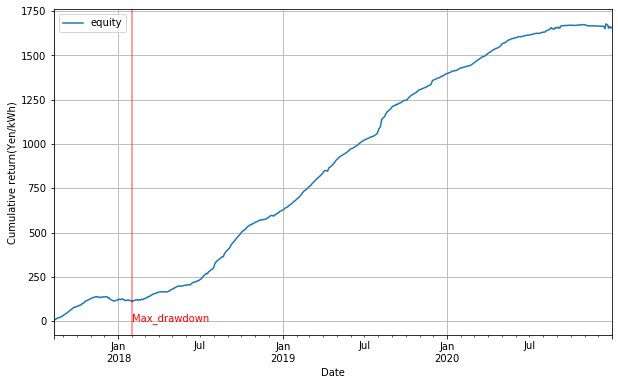

In [586]:
i = -22

#valuesの値を変えれば別のポートフォリオの集計もできる
df_trader_ex_table = pd.DataFrame(df_trader_ex.pivot(index='Date', columns='HH', values='Return_exec' + str(i)  +"%"))

df_trader_ex_table["Expected_Return"] = df_trader_ex_table.loc[: , 0:48].mean(axis=1).round(2)
df_trader_ex_table["StandardDeviation"] = df_trader_ex_table.loc[: , 1:48].std(axis=1).round(2)
df_trader_ex_table["Max"] = df_trader_ex_table.loc[: , 1:48].max(axis=1).round(2)
df_trader_ex_table["Min"] = df_trader_ex_table.loc[: , 1:48].min(axis=1).round(2)
df_trader_ex_table["SharpRatio"] = (df_trader_ex_table.loc[: , 1:48].mean(axis=1)/df_trader_ex_table.loc[: , 1:48].std(axis=1)).round(2)


# 各商品別にドローダウンを算出 ()
risk_ex = pd.DataFrame()

risk_ex["Expected_Return"] = df_trader_ex_table.loc[: , 1:48].mean(axis=1).round(2)
# risk_ex["StandardDeviation"] = df_trader_ex_table.loc[: , 1:48].std(axis=1).round(2)
# risk_ex["Max"] = df_trader_ex_table.loc[: , 1:48].max(axis=1).round(2)
# risk_ex["Min"] = df_trader_ex_table.loc[: , 1:48].min(axis=1).round(2)
risk_ex["equity"] = risk_ex['Expected_Return'].cumsum()
risk_ex["cummax"] = risk_ex["equity"].cummax()
risk_ex["drawdown"] = -(risk_ex["cummax"] - risk_ex["equity"])

# Max_drawdownを算出して並べる
max_drawdown = risk_ex["drawdown"].min()

t_max = pd.to_datetime(risk_ex["drawdown"].idxmin())

fig, ax = plt.subplots(1, figsize=(15,8))
# plt.title('Cumulative return through trading based on the difference of price on DA and Intraday')

risk_ex["equity"].plot(figsize=(10, 6))

plt.text(t_max, 0, 'Max_drawdown', rotation=0, color="r")

print("Expected_Return: " + str(risk_ex["Expected_Return"].mean().round(2)))
print("StandardDeviation: " + str(risk_ex["Expected_Return"].std().round(2)))
print("SharpRatio: " + str(round(risk_ex["Expected_Return"].mean() /  risk_ex["Expected_Return"].std(), 3)))
print("Cumulative_Return: " + str((risk_ex["cummax"].max().round(2))))
print("Drawdown: " + str(risk_ex["drawdown"].min().round(2)))


ax.set(xlabel="Date", ylabel="Cumulative return(Yen/kWh)")
plt.axvline(t_max, c="r", alpha=0.5)
plt.grid()
plt.legend();

In [587]:
# Calculate VaR

equity = 10000000

percs = np.array([1., 5.0, 10.0])
risk_ex["returns"] = np.log(risk_ex["equity"] / risk_ex["equity"].shift(1))
VaR = scs.scoreatpercentile(equity * risk_ex["returns"], percs)
def print_var():
    print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
    print(43 * '-')
    for pair in zip(percs, VaR):
        print('%16.0f %16.0f' % (100 - pair[0], -pair[1]))
        
print_var()

Confidence Level    Value-at-Risk
-------------------------------------------
              99           179011
              95            24743
              90             3036


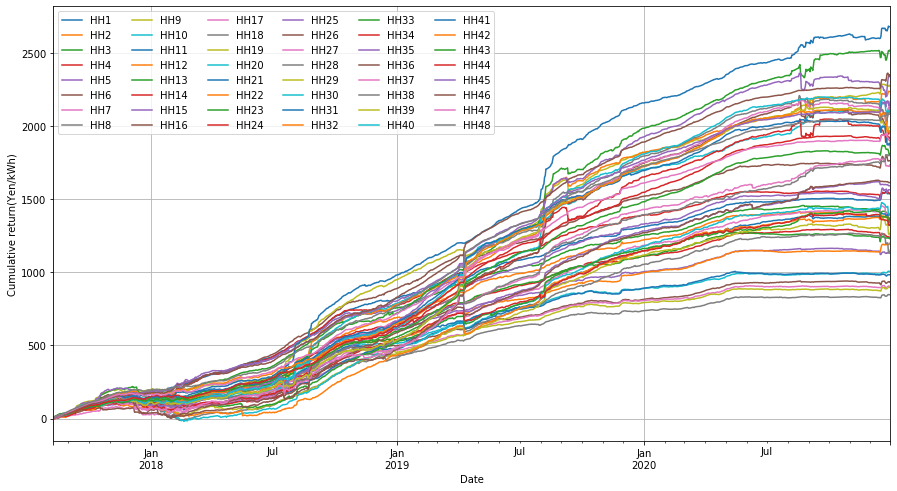

In [588]:
# 各商品の累計リターンを全てプロット
fig, ax = plt.subplots(1, figsize=(15,8))
# plt.title('Cumulative return through trading based on the difference of price on DA and Intraday')


# Portfolio別の評価指標 (縦軸:年月日、横軸：48商品 + 各指標集計)
Equity = []
ExpectedReturn = []
Max = []
Min = []
StandardDeviation = []
SharpRatio= []
CumMax = []
MaxDrawdown = []

# Execution baffer　(%)
i = -22

for HH in list(range(1, 49, 1)):
#　各itemsの売り買いポジションの組み合わせをPortfolioとする
    df_trader_portfolio_ex_table = pd.DataFrame(df_trader_ex.pivot(index='Date', columns='HH', values='Return_exec' + str(i)  +"%"))
    
    # For plot and for calculating drawdown
    equity = df_trader_portfolio_ex_table[HH].cumsum().round(2)
    # Plot the performance of each HH spot
    equity.plot(label="HH" + str(HH))
    
    # Keep in a list for calculating drawdown
    Equity.append(equity)
    cummax = equity.cummax()
    drawdown = -(cummax - equity)

    # Calculation for each evaluation on each HH slot
    HH_Return = df_trader_portfolio_ex_table[HH].mean().round(2)
    HH_Std = df_trader_portfolio_ex_table[HH].std().round(2)
    ExpectedReturn.append(HH_Return)
    StandardDeviation.append(HH_Std)
    Max.append(df_trader_portfolio_ex_table[HH].max().round(2))
    Min.append(df_trader_portfolio_ex_table[HH].min().round(2))
    SharpRatio.append((HH_Return / HH_Std).round(2))
    CumMax.append(cummax.max().round(2))
    MaxDrawdown.append(drawdown.min().round(2))

ax.set(xlabel="Date", ylabel="Cumulative return(Yen/kWh)")
plt.grid()
plt.legend(loc="upper left", ncol=6);

In [589]:
df_trader_HH_ex_Eval = pd.DataFrame()
df_trader_HH_ex_Eval["HH"] =  pd.Series(list(range(1,49,1)))

df_trader_HH_ex_Eval["ExpectedReturn"]  = pd.Series(ExpectedReturn)
df_trader_HH_ex_Eval["Max"]  = pd.Series(Max)
df_trader_HH_ex_Eval["Min"]  = pd.Series(Min)
df_trader_HH_ex_Eval["StandardDeviation"]  = pd.Series(StandardDeviation)
df_trader_HH_ex_Eval["SharpRatio"]  = pd.Series(SharpRatio)
df_trader_HH_ex_Eval["CumMax"] = pd.Series(CumMax)
df_trader_HH_ex_Eval["MaxDrawdown"]  = pd.Series(MaxDrawdown)

In [590]:
df_trader_HH_ex_Eval[df_trader_HH_ex_Eval["CumMax"] == df_trader_HH_ex_Eval["CumMax"].max()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
30,31,2.16,51.77,-23.44,4.83,0.45,2684.34,-40.57


HH40 --> 19:30

In [591]:
df_trader_HH_ex_Eval[df_trader_HH_ex_Eval["CumMax"] == df_trader_HH_ex_Eval["CumMax"].min()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
7,8,0.68,14.1,-7.4,1.51,0.45,848.54,-43.6


HH18 --> 8:30

In [592]:
df_trader_HH_ex_Eval[df_trader_HH_ex_Eval["MaxDrawdown"] == df_trader_HH_ex_Eval["MaxDrawdown"].min()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
35,36,1.71,55.35,-106.93,6.38,0.27,2178.99,-201.23


HH33 --> 16:00

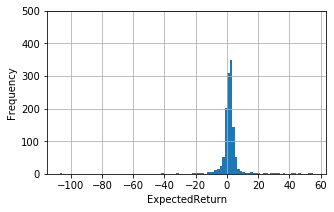

In [610]:
fig, ax = plt.subplots(1, figsize=(5,3))
df_trader_portfolio_ex_table[36].hist(bins=100)
plt.ylim(0, 500)
ax.set(xlabel="ExpectedReturn", ylabel="Frequency");

In [611]:
df_trader_HH_ex_Eval[df_trader_HH_ex_Eval["MaxDrawdown"] == df_trader_HH_ex_Eval["MaxDrawdown"].max()]

,HH,ExpectedReturn,Max,Min,StandardDeviation,SharpRatio,CumMax,MaxDrawdown
47,48,1.68,51.39,-4.74,2.72,0.62,2094.58,-15.0


HH6 --> 2:30

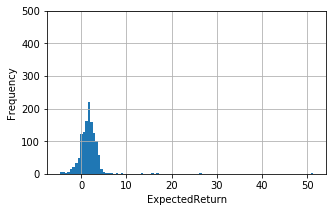

In [612]:
fig, ax = plt.subplots(1, figsize=(5,3))
df_trader_portfolio_ex_table[48].hist(bins=100)
plt.ylim(0, 500)
ax.set(xlabel="ExpectedReturn", ylabel="Frequency");